# Predicción de la duración de viaje en taxi en NYC

## 1. **Importación de la base de datos**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-taxi-trip-noisy/test_steps.csv
/kaggle/input/nyc-taxi-trip-noisy/train_augmented.csv
/kaggle/input/nyc-taxi-trip-noisy/polylines.csv
/kaggle/input/nyc-taxi-trip-noisy/train_bugs.csv
/kaggle/input/nyc-taxi-trip-noisy/test_bugs.csv
/kaggle/input/nyc-taxi-trip-noisy/test_augmented.csv


## 2. **Lectura de la base de datos**

In [2]:
df_train_augmented = pd.read_csv("/kaggle/input/nyc-taxi-trip-noisy/train_augmented.csv")
df_train_bugs = pd.read_csv("/kaggle/input/nyc-taxi-trip-noisy/train_bugs.csv")
df_polylines = pd.read_csv("/kaggle/input/nyc-taxi-trip-noisy/polylines.csv")

df_test_augmented = pd.read_csv("/kaggle/input/nyc-taxi-trip-noisy/test_augmented.csv")
df_test_bugs = pd.read_csv("/kaggle/input/nyc-taxi-trip-noisy/test_bugs.csv")
df_test_steps = pd.read_csv("/kaggle/input/nyc-taxi-trip-noisy/test_steps.csv")

In [3]:
df_train_augmented.head(7)

,id,distance,duration,motorway,trunk,primary,secondary,tertiary,unclassified,residential,nTrafficSignals,nCrossing,nStop,nIntersection,srcCounty,dstCounty
0,id2875421,2009.1,160.9,0.0,0.00000,0.0,0.000000,1.000000,0.000000,0.000000,14,5,0,4,1.0,1.0
1,id2377394,2513.4,256.5,0.0,0.00000,0.0,0.348518,0.174776,0.000000,0.143903,25,13,0,0,1.0,1.0
2,id3858529,9910.7,679.6,0.0,0.54282,0.0,0.372717,0.039806,0.000000,0.006861,38,12,0,3,1.0,1.0
3,id3504673,1779.1,181.8,0.0,0.00000,0.0,0.000000,0.424452,0.000000,0.039741,18,6,0,1,1.0,1.0
4,id2181028,1615.0,132.2,0.0,0.00000,0.0,0.637338,0.362663,0.000000,0.000000,17,2,0,2,1.0,1.0
5,id0801584,1393.6,142.9,0.0,0.00000,0.0,0.000000,0.238393,0.537783,0.223825,12,3,0,0,1.0,1.0
6,id1813257,1704.9,135.5,0.0,0.00000,0.0,1.000000,0.000000,0.000000,0.000000,19,0,0,2,1.0,1.0


In [4]:
df_train_bugs.head(7)

,id,bug
0,id2875421,0
1,id2377394,0
2,id3858529,0
3,id3504673,0
4,id2181028,0
5,id0801584,0
6,id1813257,0


In [5]:
df_polylines.head(7)

,wayId,polyline
0,4374873,aldeGp}v_NiAR_BLiDF
1,4374883,knleGhcw`Nce@j`A
2,4374895,{xyeGfzbaNyBDmGDoIB_H?cN?mI?cFE
3,4374901,aekeG`yy}MxYzyBjK~i@nB|NlA|Ml@nQZzZz@pQpBdUbDf...
4,4426015,}`ltF~ecsM_Gb]SrAk@lEUnCc@~DS~BSzDWvGGbg@
5,4426051,{yltFfcdrMnCpMhBnOt@`OBdA
6,4426077,wxotFlfpoMw@fG_AjGy@vEmAjGiDnOmEtRyCvM


In [6]:
df_test_augmented.head(7)

,id,distance,duration,motorway,trunk,primary,secondary,tertiary,unclassified,residential,nTrafficSignals,nCrossing,nStop,nIntersection,srcCounty,dstCounty
0,id3004672,3795.9,360.7,0.0,0.000000,0.000000,0.522511,0.477489,0.000000,0.000000,37,39,0,1,1.0,1.0
1,id3505355,2829.9,196.4,0.0,0.000000,0.000000,0.255318,0.724963,0.000000,0.000000,5,0,0,17,3.0,3.0
2,id1217141,1499.5,148.5,0.0,0.000000,0.000000,0.428047,0.231395,0.000000,0.000000,12,4,0,0,1.0,1.0
3,id2150126,6492.3,442.4,0.0,0.561299,0.000000,0.213389,0.074967,0.000000,0.078344,23,9,0,0,1.0,1.0
4,id1598245,1108.2,94.0,0.0,0.000000,0.000000,0.638693,0.195813,0.000000,0.000000,9,0,0,1,1.0,1.0
5,id0668992,5841.6,404.2,0.0,0.410613,0.279484,0.066166,0.069126,0.135827,0.024920,31,3,0,3,1.0,1.0
6,id1765014,7859.7,591.5,0.0,0.333758,0.000000,0.576265,0.058990,0.000000,0.030987,23,18,0,8,1.0,3.0


In [7]:
df_test_bugs.head(7)

,id,bug,trip_duration
0,id3004672,0,0
1,id3505355,0,0
2,id1217141,0,0
3,id2150126,0,0
4,id1598245,0,0
5,id0668992,0,0
6,id1765014,0,0


In [8]:
df_test_steps.head(7)

,id,wayId,portion
0,id3004672,438389785,0.019574
1,id3004672,496992369,0.023051
2,id3004672,5671774,0.185226
3,id3004672,489019754,0.043099
4,id3004672,388240124,0.230854
5,id3004672,458166897,0.020707
6,id3004672,46469720,0.041650


In [9]:
df_train_augmented.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458643 entries, 0 to 1458642
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1458643 non-null  object 
 1   distance         1458643 non-null  float64
 2   duration         1458643 non-null  float64
 3   motorway         1458643 non-null  float64
 4   trunk            1458643 non-null  float64
 5   primary          1458643 non-null  float64
 6   secondary        1458643 non-null  float64
 7   tertiary         1458643 non-null  float64
 8   unclassified     1458643 non-null  float64
 9   residential      1458643 non-null  float64
 10  nTrafficSignals  1458643 non-null  int64  
 11  nCrossing        1458643 non-null  int64  
 12  nStop            1458643 non-null  int64  
 13  nIntersection    1458643 non-null  int64  
 14  srcCounty        1457416 non-null  float64
 15  dstCounty        1452305 non-null  float64
dtypes: float64(11), in

In [10]:
df_test_augmented.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               625134 non-null  object 
 1   distance         625134 non-null  float64
 2   duration         625134 non-null  float64
 3   motorway         625134 non-null  float64
 4   trunk            625134 non-null  float64
 5   primary          625134 non-null  float64
 6   secondary        625134 non-null  float64
 7   tertiary         625134 non-null  float64
 8   unclassified     625134 non-null  float64
 9   residential      625134 non-null  float64
 10  nTrafficSignals  625134 non-null  int64  
 11  nCrossing        625134 non-null  int64  
 12  nStop            625134 non-null  int64  
 13  nIntersection    625134 non-null  int64  
 14  srcCounty        624606 non-null  float64
 15  dstCounty        622489 non-null  float64
dtypes: float64(11), int64(4), object(1)
me

In [11]:
df_train_augmented.shape

(1458643, 16)

In [12]:
df_train_augmented.dtypes

id                  object
distance           float64
duration           float64
motorway           float64
trunk              float64
primary            float64
secondary          float64
tertiary           float64
unclassified       float64
residential        float64
nTrafficSignals      int64
nCrossing            int64
nStop                int64
nIntersection        int64
srcCounty          float64
dstCounty          float64
dtype: object

## 3. **Identificación de valores nulos y duplicados**

In [13]:
df_train_augmented.isnull().sum()

id                    0
distance              0
duration              0
motorway              0
trunk                 0
primary               0
secondary             0
tertiary              0
unclassified          0
residential           0
nTrafficSignals       0
nCrossing             0
nStop                 0
nIntersection         0
srcCounty          1227
dstCounty          6338
dtype: int64

<Axes: >

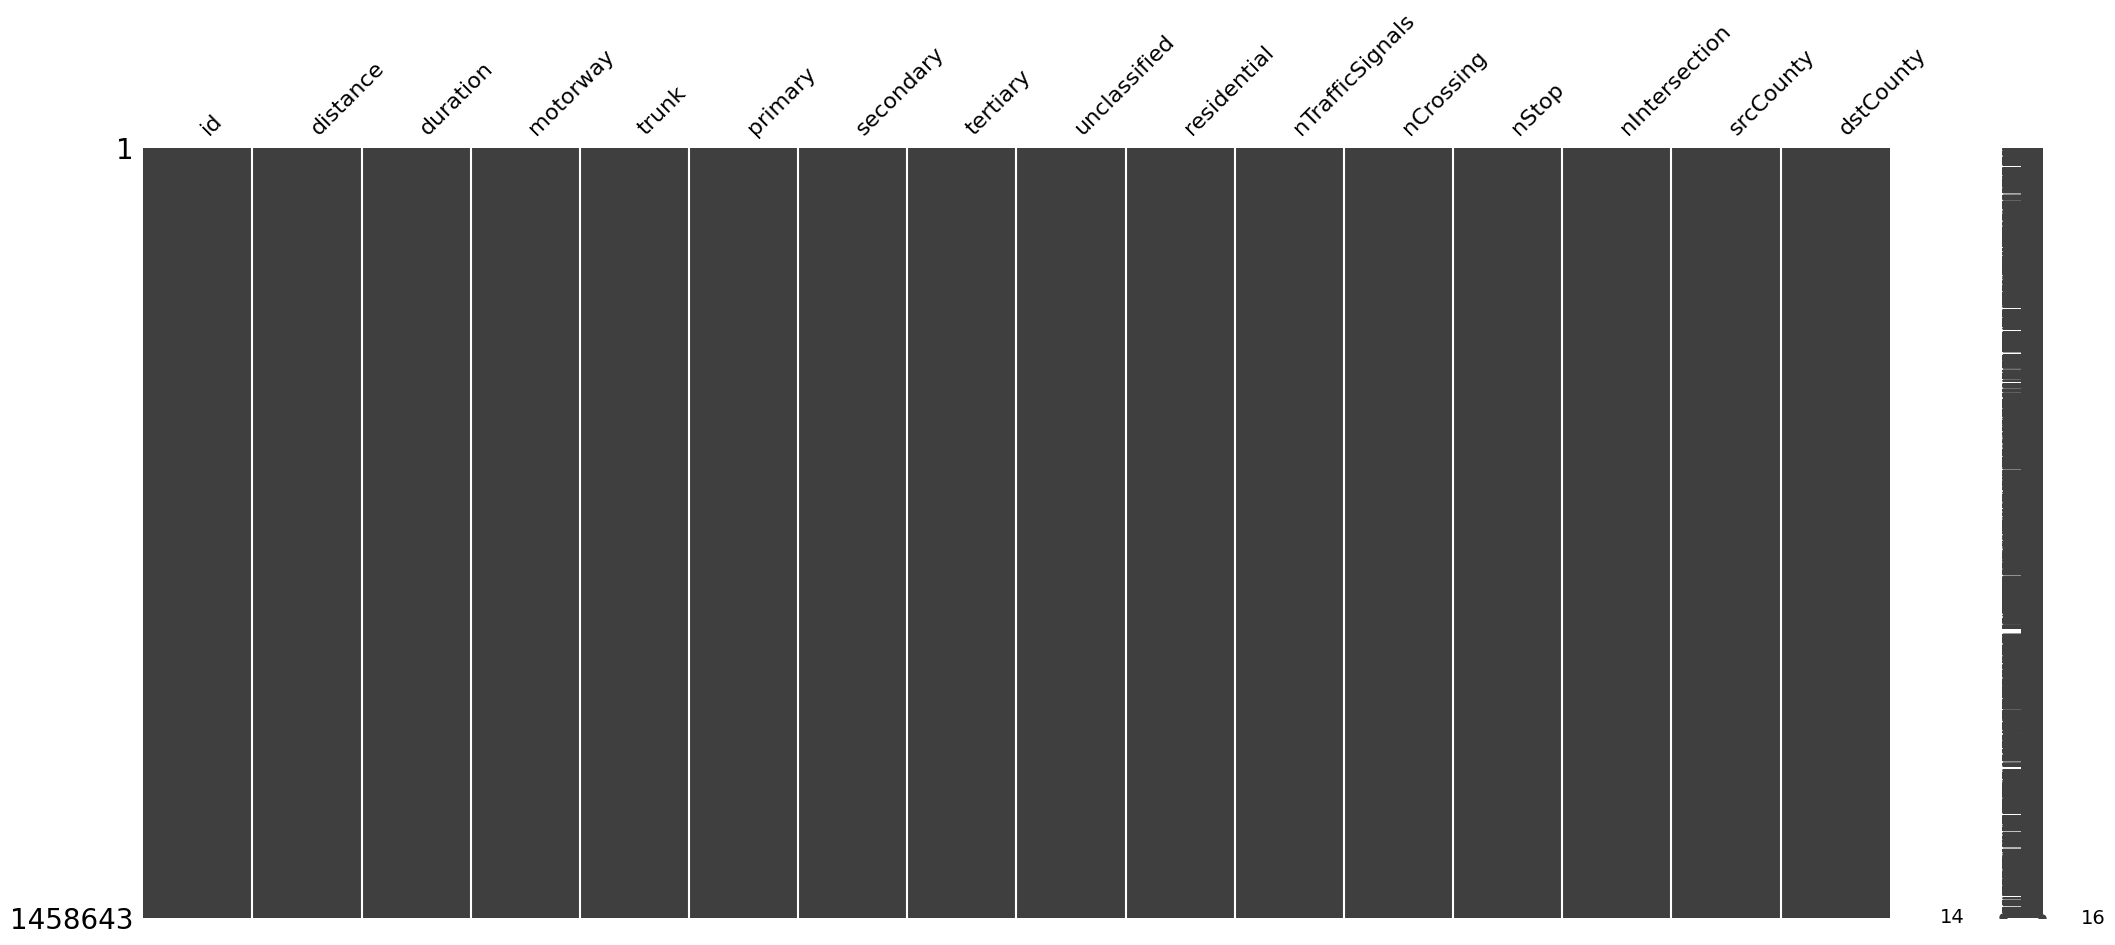

In [14]:
import missingno as msno
msno.matrix(df_train_augmented)

In [15]:
df_train_augmented.duplicated().sum()

0

## 4. **Eliminación de valores nulos y duplicados**

In [16]:
df_train_augmented.drop(columns=['srcCounty','dstCounty'], inplace=True)

In [17]:
#df_train_augmented['primary'].unique()

In [18]:
df_train_augmented.isnull().sum()

id                 0
distance           0
duration           0
motorway           0
trunk              0
primary            0
secondary          0
tertiary           0
unclassified       0
residential        0
nTrafficSignals    0
nCrossing          0
nStop              0
nIntersection      0
dtype: int64

## 5. **Selección de una muestra aletoria a partir de la base de datos**

In [19]:
tamanio_muestra = 100000

In [20]:
#filtrar
lista_ID = df_train_augmented.sample(tamanio_muestra)["id"].tolist()

In [21]:
df_train_augmented_muestra = df_train_augmented[df_train_augmented.id.isin(lista_ID)]
del df_train_augmented

In [22]:
df_train_augmented_muestra.shape

(100000, 14)

In [23]:
cat=["id"]
df_train_augmented_muestra_cat=df_train_augmented_muestra[cat]
df_train_augmented_muestra_cat.columns

Index(['id'], dtype='object')

In [24]:
df_train_augmented_muestra_num=df_train_augmented_muestra.drop(columns=df_train_augmented_muestra_cat)
df_train_augmented_muestra_num.columns

Index(['distance', 'duration', 'motorway', 'trunk', 'primary', 'secondary',
       'tertiary', 'unclassified', 'residential', 'nTrafficSignals',
       'nCrossing', 'nStop', 'nIntersection'],
      dtype='object')

## 6. **Descripción de la base de datos final**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [26]:
df_train_augmented_muestra_num.describe()

,distance,duration,motorway,trunk,primary,secondary,tertiary,unclassified,residential,nTrafficSignals,nCrossing,nStop,nIntersection
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,4580.867627,344.009895,0.000425,0.126387,0.030416,0.266258,0.418484,0.012999,0.044454,24.479830,8.80640,0.114380,2.514200
std,5605.796117,304.360678,0.006239,0.258124,0.119657,0.310465,0.350480,0.063240,0.116930,14.633182,9.24848,0.456989,5.211199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1649.400000,155.300000,0.000000,0.000000,0.000000,0.000000,0.082149,0.000000,0.000000,14.000000,2.00000,0.000000,0.000000
50%,2732.350000,249.700000,0.000000,0.000000,0.000000,0.130662,0.346810,0.000000,0.000000,21.000000,6.00000,0.000000,1.000000
75%,5054.175000,425.025000,0.000000,0.000000,0.000000,0.457423,0.754647,0.000000,0.025196,32.000000,13.00000,0.000000,3.000000
max,592484.000000,23929.100000,0.460681,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,108.000000,90.00000,8.000000,103.000000


## 7. **Análisis de correlación entre las variables**

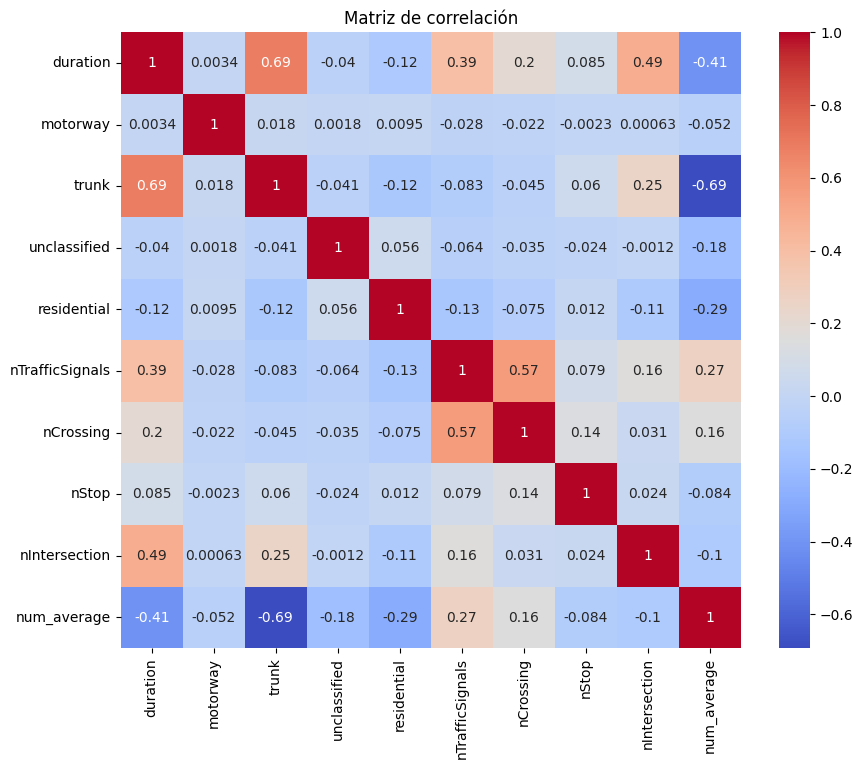

In [107]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train_augmented_muestra_num.corr(), cmap="coolwarm", annot=True)
plt.title("Matriz de correlación")
plt.show()

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleccionar solo las variables independientes (excluyendo la variable target)
independent_vars = df_train_augmented_muestra_num.drop(columns=['duration'])

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_vars.columns
vif_data["VIF"] = [variance_inflation_factor(independent_vars.values, i) for i in range(independent_vars.shape[1])]

print(vif_data)

           Variable       VIF
0          distance  5.071267
1          motorway  1.004197
2             trunk  3.092938
3           primary  1.324572
4         secondary  1.946907
5          tertiary  2.304428
6      unclassified  1.030564
7       residential  1.084985
8   nTrafficSignals  7.114452
9         nCrossing  2.887192
10            nStop  1.099260
11    nIntersection  1.587161


## 8. **Manipulación de algunas variables**

In [29]:
df_train_augmented_muestra_num.drop(columns=['distance'], inplace=True)

In [30]:
df_train_augmented_muestra_num['num_average']=(df_train_augmented_muestra_num['primary']+df_train_augmented_muestra_num['secondary']+df_train_augmented_muestra_num['tertiary'])/3

In [31]:
df_train_augmented_muestra_num=df_train_augmented_muestra_num.drop(columns=['primary','secondary','tertiary'])
df_train_augmented_muestra_num.columns

Index(['duration', 'motorway', 'trunk', 'unclassified', 'residential',
       'nTrafficSignals', 'nCrossing', 'nStop', 'nIntersection',
       'num_average'],
      dtype='object')

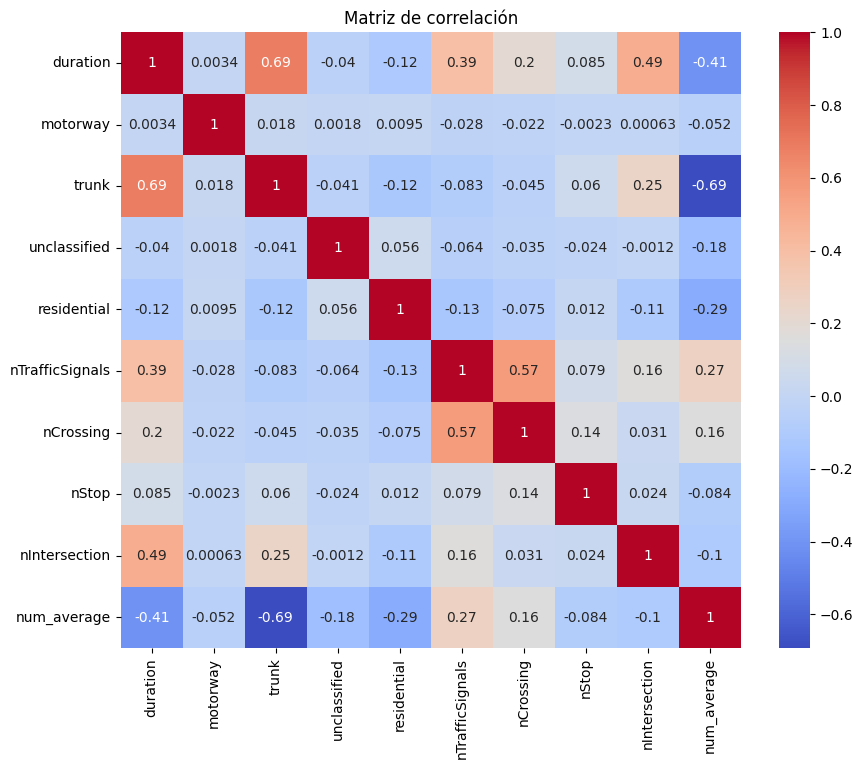

In [108]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train_augmented_muestra_num.corr(), cmap="coolwarm", annot=True)
plt.title("Matriz de correlación")
plt.show()

In [ ]:
#important_num_cols = list(df_train_augmented_num.corr()["duration"][(df_train_augmented_num.corr()["duration"]>0.50) | (df_train_augmented_num.corr()["duration"]<-0.50)].index)
#print(important_num_cols)

## 9. **Visualización de la distribución de las variables**

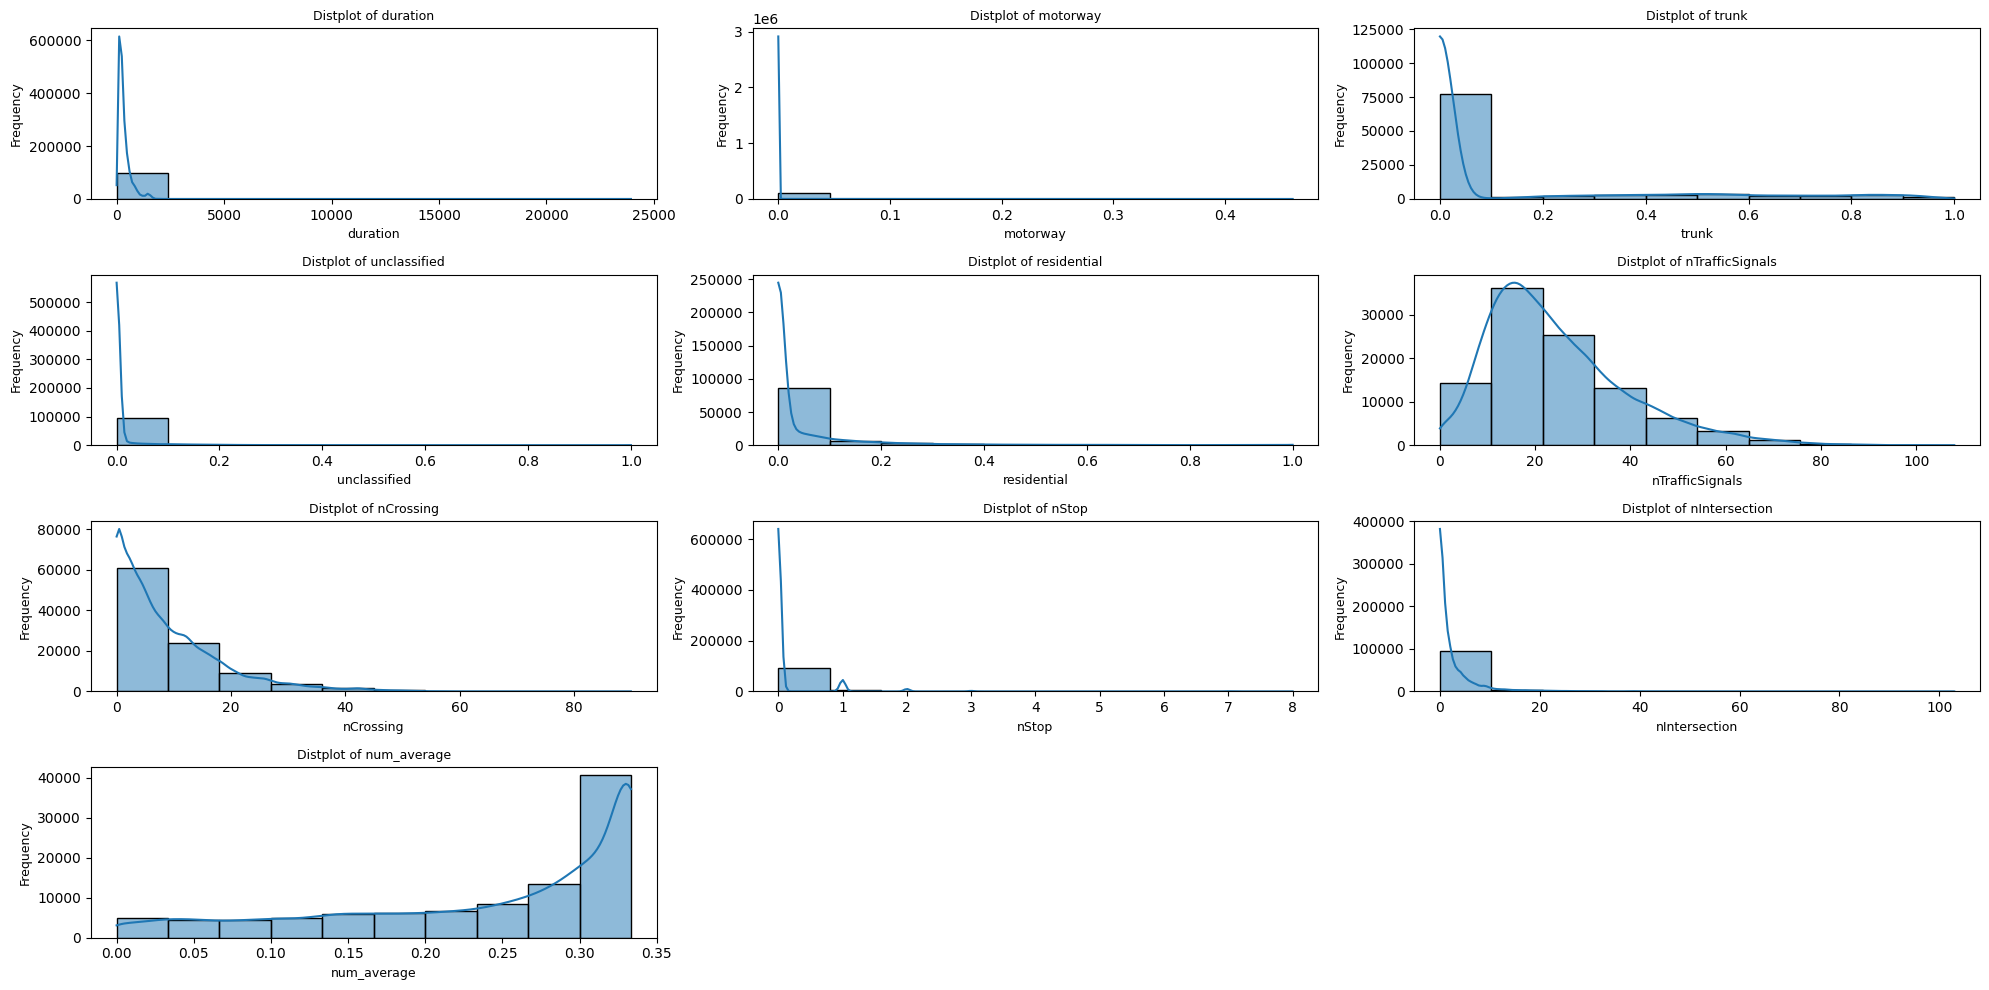

In [109]:
plt.figure(1, figsize=(20, 10))
n = 0 
for x in df_train_augmented_muestra_num.columns:
    n += 1
    plt.subplot(4, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.8)
    sns.histplot(df_train_augmented_muestra_num[x], bins=10, kde=True)
    plt.title('Distplot of {}'.format(x), fontsize=9) 
    plt.xlabel('{}'.format(x), fontsize=9)  
    plt.ylabel('Frequency', fontsize=9)
    plt.tight_layout()
plt.show()

## 10. **Visualización de variables independientes con la dependiente "duration"**

In [35]:
# Número de características numéricas
n_features = len(df_train_augmented_muestra_num.columns)

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 15))

# Crear subplots dinámicamente según el número de características
for i, feature in enumerate(df_train_augmented_muestra_num.columns, 1):
    plt.subplot(2, (n_features + 1) // 2, i)  # Ajustar dinámicamente el número de filas y columnas
    sns.scatterplot(data=df_train_augmented_muestra_num, x=feature, y='duration', alpha=0.6)
    sns.regplot(data=df_train_augmented_muestra_num, x=feature, y='duration', scatter=False, color='red')
    plt.title(f'Relación entre duration vs {feature}')
    plt.tight_layout()

plt.show()

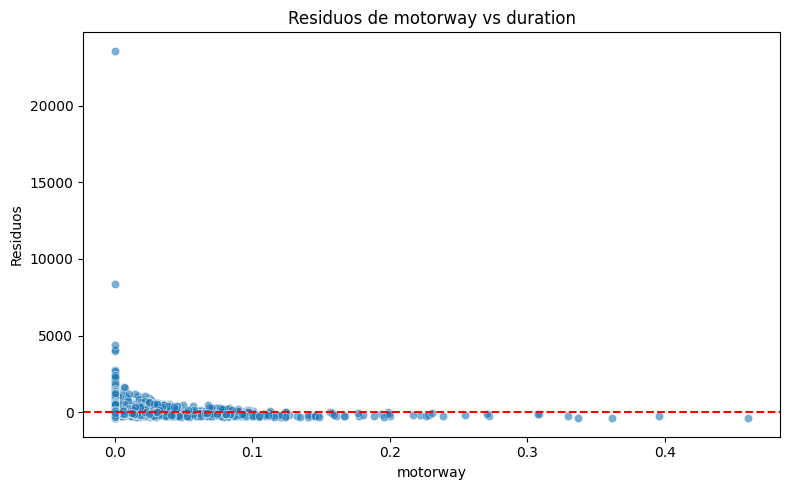

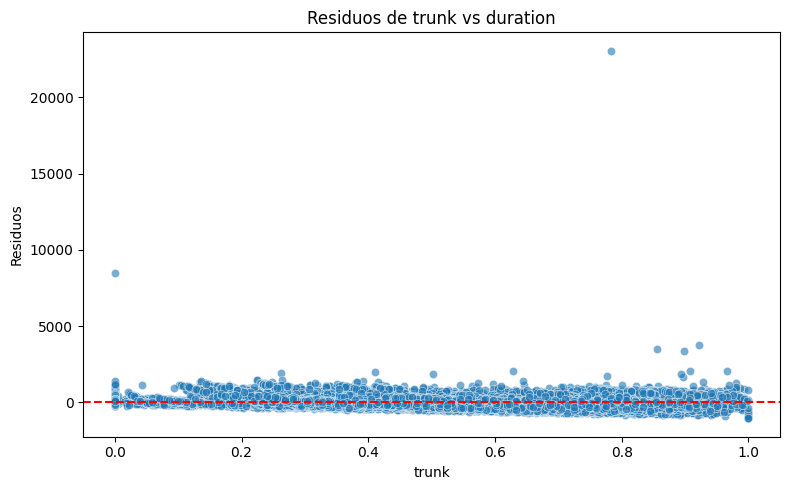

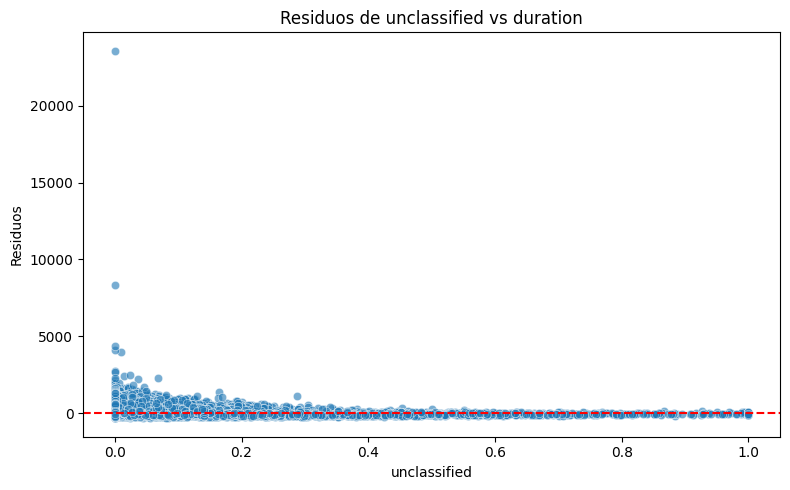

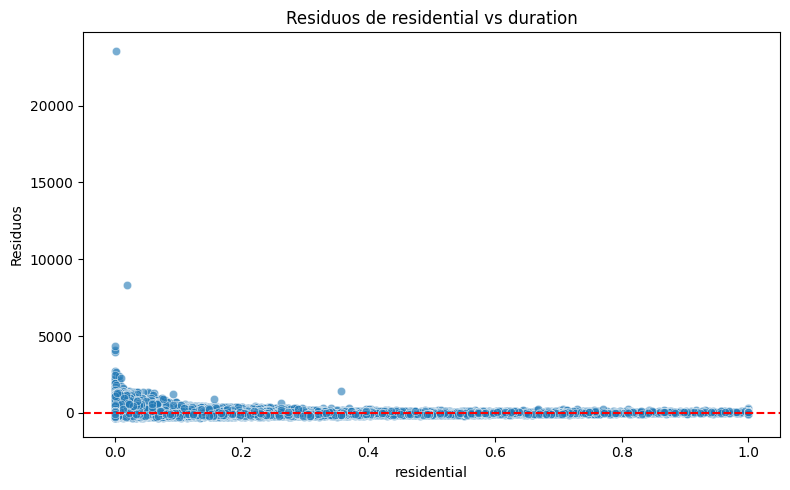

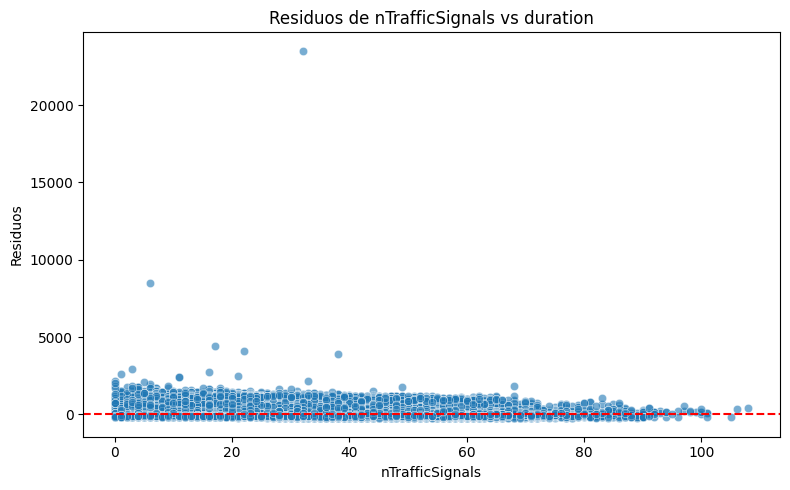

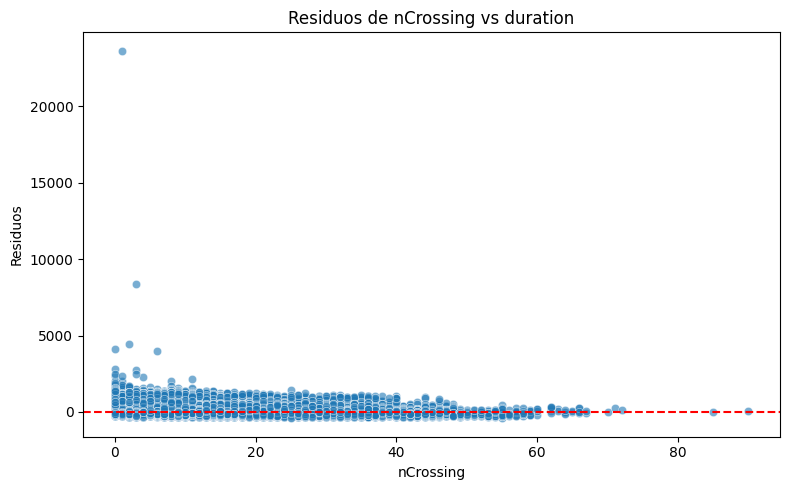

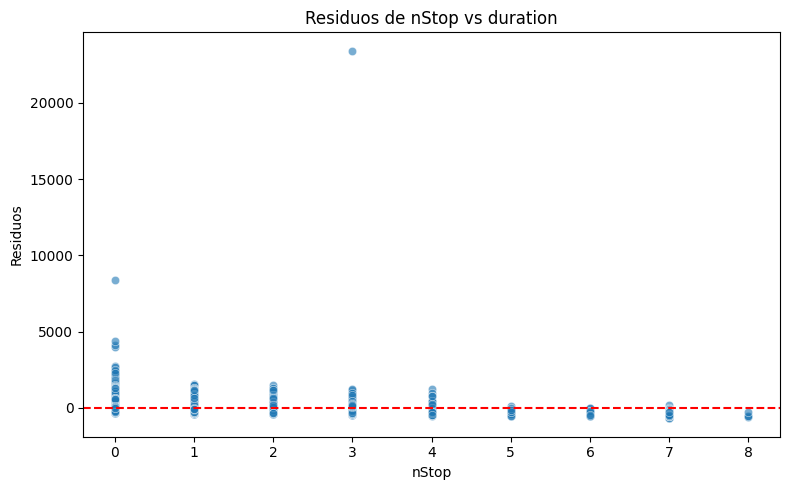

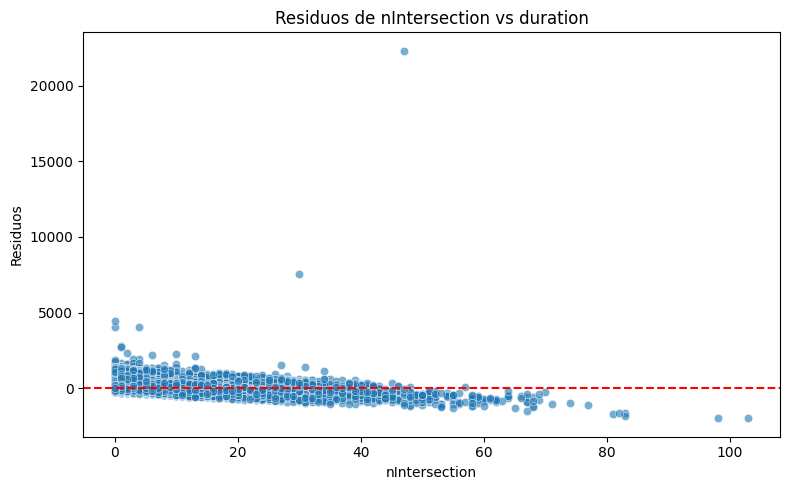

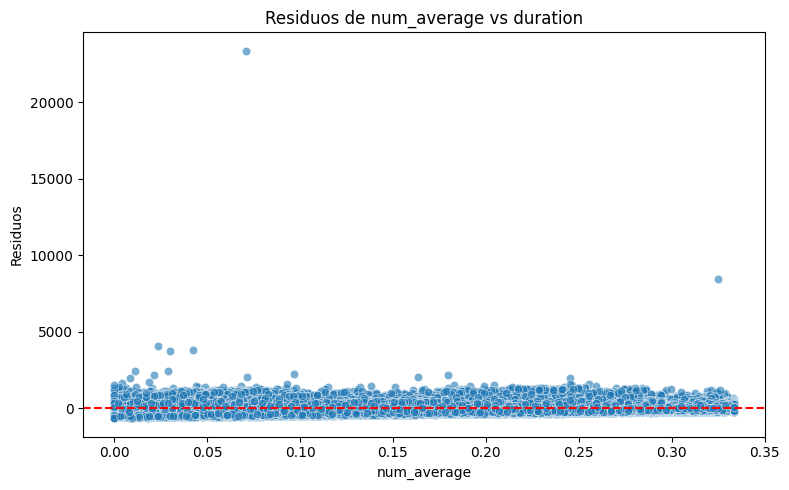

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Supongamos que 'dependent_variable' es el nombre de tu columna dependiente
dependent_variable = 'duration'

# Iterar sobre cada columna independiente (excluyendo la dependiente)
for independent_variable in df_train_augmented_muestra_num.columns:
    if independent_variable != dependent_variable:
        # Ajustar un modelo lineal
        model = LinearRegression()
        model.fit(df_train_augmented_muestra_num[[independent_variable]], df_train_augmented_muestra_num[dependent_variable])

        # Calcular residuos
        residuos = df_train_augmented_muestra_num[dependent_variable] - model.predict(df_train_augmented_muestra_num[[independent_variable]])

        # Gráfico de residuos
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=df_train_augmented_muestra_num[independent_variable], y=residuos, alpha=0.6)
        plt.axhline(y=0, color='red', linestyle='--')
        plt.title(f'Residuos de {independent_variable} vs {dependent_variable}')
        plt.xlabel(independent_variable)
        plt.ylabel('Residuos')
        plt.tight_layout()
        plt.show()

In [37]:
# Supongamos que 'dependent_variable' es el nombre de tu columna dependiente
dependent_variable = 'duration'

# Iterar sobre cada columna independiente (excluyendo la dependiente)
for independent_variable in df_train_augmented_muestra_num.columns:
    if independent_variable != dependent_variable:
        # Calcular la correlación
        correlacion = df_train_augmented_muestra_num[independent_variable].corr(df_train_augmented_muestra_num[dependent_variable])
        
        # Imprimir el resultado
        print(f"Coeficiente de correlación entre '{independent_variable}' y '{dependent_variable}': {correlacion:.4f}")

Coeficiente de correlación entre 'motorway' y 'duration': 0.0034
Coeficiente de correlación entre 'trunk' y 'duration': 0.6891
Coeficiente de correlación entre 'unclassified' y 'duration': -0.0403
Coeficiente de correlación entre 'residential' y 'duration': -0.1165
Coeficiente de correlación entre 'nTrafficSignals' y 'duration': 0.3919
Coeficiente de correlación entre 'nCrossing' y 'duration': 0.1997
Coeficiente de correlación entre 'nStop' y 'duration': 0.0854
Coeficiente de correlación entre 'nIntersection' y 'duration': 0.4856
Coeficiente de correlación entre 'num_average' y 'duration': -0.4133


In [38]:
import statsmodels.api as sm  # Importar statsmodels

# Diccionario para almacenar los resultados de la prueba RESET
reset_results = {}

# Iterar sobre cada columna independiente
for independent_variable in df_train_augmented_muestra_num.columns:
    if independent_variable != dependent_variable:
        # Ajustar un modelo lineal
        X = sm.add_constant(df_train_augmented_muestra_num[[independent_variable]])  # Agregar constante (intercepto)
        model = sm.OLS(df_train_augmented_muestra_num[dependent_variable], X).fit()  # Ajustar el modelo

        # Prueba RESET
        f_statistic, p_value = sm.stats.linear_rainbow(model)  # Realizar la prueba RESET
        
        # Guardar en el diccionario
        reset_results[independent_variable] = {
            'Estadístico F': f_statistic,
            'P-valor': p_value
        }

# Imprimir el diccionario
for variable, resultados in reset_results.items():
    print(f"Prueba RESET para '{variable}':")
    print(f"Estadístico F: {resultados['Estadístico F']:.4f}")
    print(f"P-valor: {resultados['P-valor']:.4f}")
    print("-" * 50)

Prueba RESET para 'motorway':
Estadístico F: 0.8747
P-valor: 1.0000
--------------------------------------------------
Prueba RESET para 'trunk':
Estadístico F: 0.7784
P-valor: 1.0000
--------------------------------------------------
Prueba RESET para 'unclassified':
Estadístico F: 0.8749
P-valor: 1.0000
--------------------------------------------------
Prueba RESET para 'residential':
Estadístico F: 0.8733
P-valor: 1.0000
--------------------------------------------------
Prueba RESET para 'nTrafficSignals':
Estadístico F: 0.8523
P-valor: 1.0000
--------------------------------------------------
Prueba RESET para 'nCrossing':
Estadístico F: 0.8715
P-valor: 1.0000
--------------------------------------------------
Prueba RESET para 'nStop':
Estadístico F: 0.8755
P-valor: 1.0000
--------------------------------------------------
Prueba RESET para 'nIntersection':
Estadístico F: 0.8588
P-valor: 1.0000
--------------------------------------------------
Prueba RESET para 'num_average':
E

## 11. **Identificación de outliers**

ValueError: num must be an integer with 1 <= num <= 9, not 10

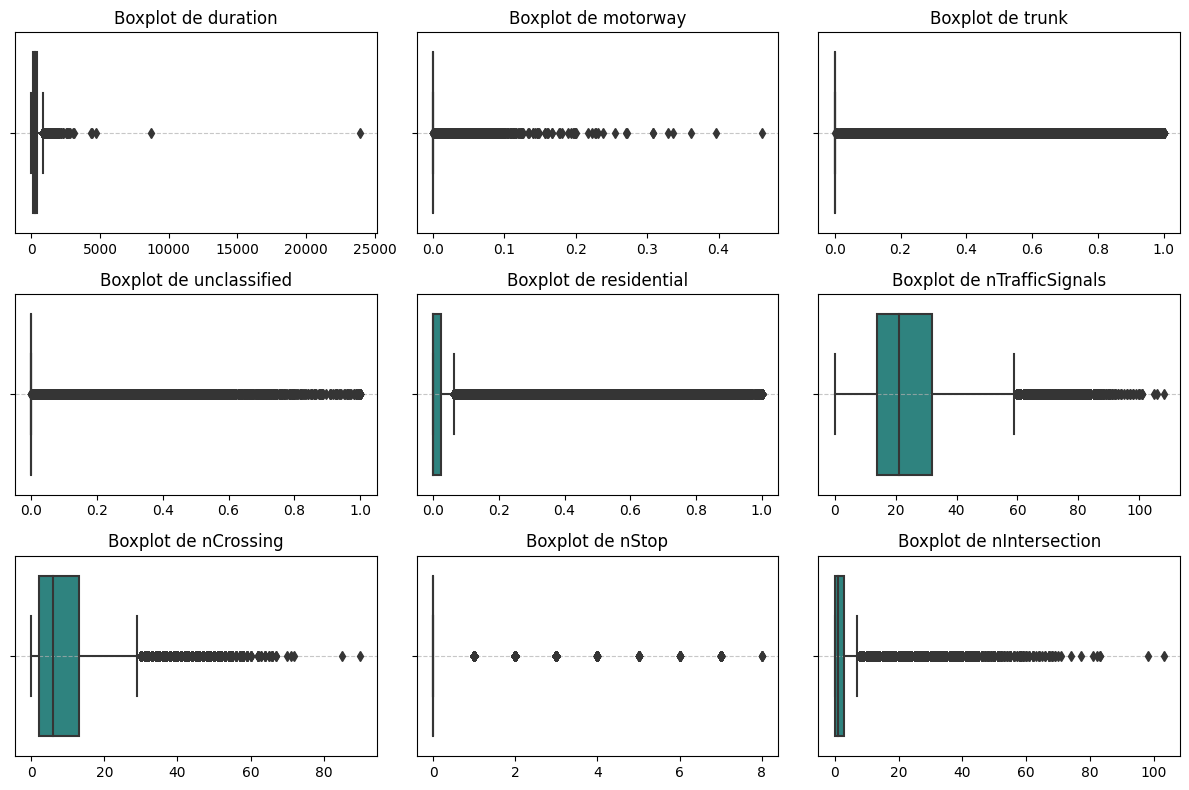

In [39]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_train_augmented_muestra_num.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_train_augmented_muestra_num[col], palette='viridis')
    plt.title(f'Boxplot de {col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
plt.show()

## 12. **Aplicación de logaritmo neperiano a la base de datos**

In [40]:
# Aplicar la transformación de log1p a cada columna numérica
df_train_augmented_muestra_num_transformed_1 = df_train_augmented_muestra_num.copy()

for column in df_train_augmented_muestra_num.columns:
    df_train_augmented_muestra_num_transformed_1[column] = np.log1p(df_train_augmented_muestra_num_transformed_1[column])

## 13. **Aplicación de Transformación box-cox a la base de datos**

In [41]:
from scipy.stats import boxcox
import numpy as np

# Aplicar la transformación de Box-Cox a cada columna numérica
df_train_augmented_muestra_num_transformed = df_train_augmented_muestra_num.copy()  # Copia del DataFrame original para preservar los datos originales

for column in df_train_augmented_muestra_num.columns:
    df_train_augmented_muestra_num_transformed[column], _ = boxcox(df_train_augmented_muestra_num_transformed[column] + 1)  # Se suma 1 para evitar log(0)

# df_boxcox_transformed ahora contiene el DataFrame con la transformación de Box-Cox aplicada a las columnas numéricas

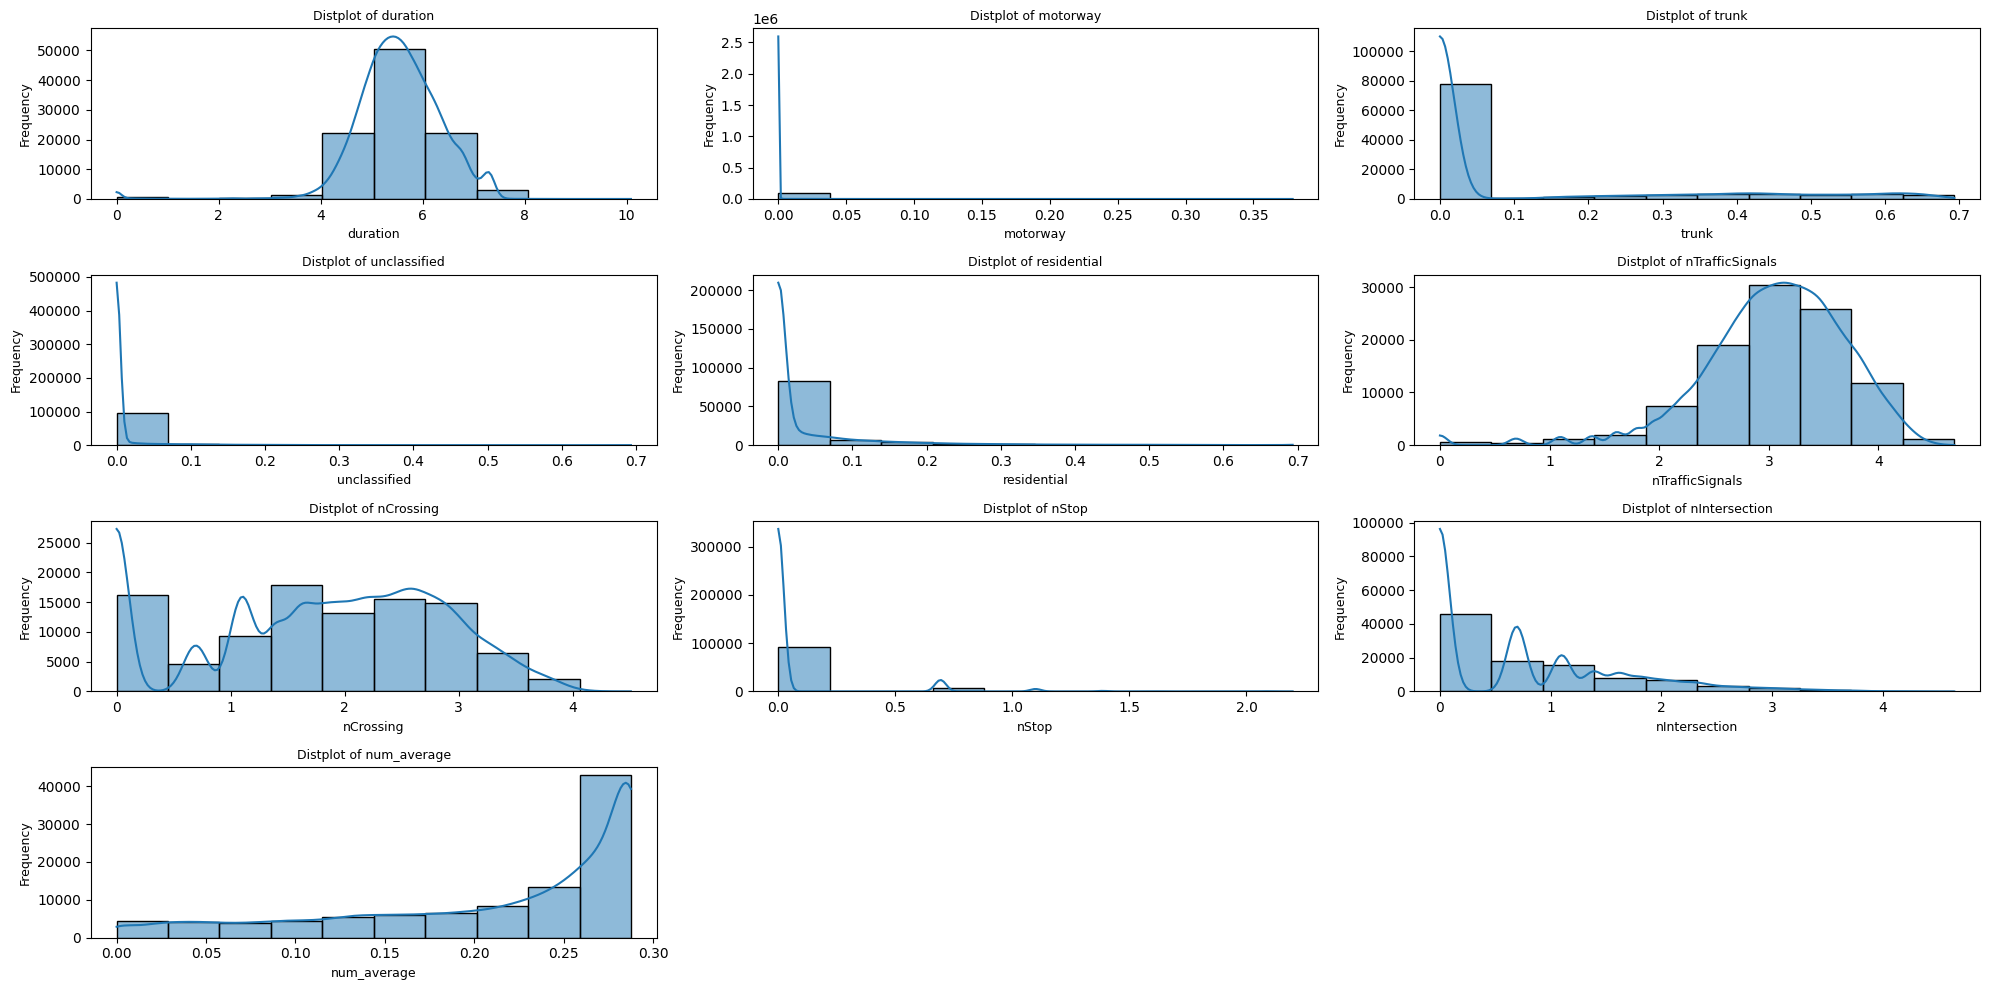

In [42]:
plt.figure(1, figsize=(20, 10))
n = 0 
for x in df_train_augmented_muestra_num.columns:
    n += 1
    plt.subplot(4, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.8)
    sns.histplot(df_train_augmented_muestra_num_transformed_1[x], bins=10, kde=True)
    plt.title('Distplot of {}'.format(x), fontsize=9) 
    plt.xlabel('{}'.format(x), fontsize=9)  
    plt.ylabel('Frequency', fontsize=9)
    plt.tight_layout()
plt.show()

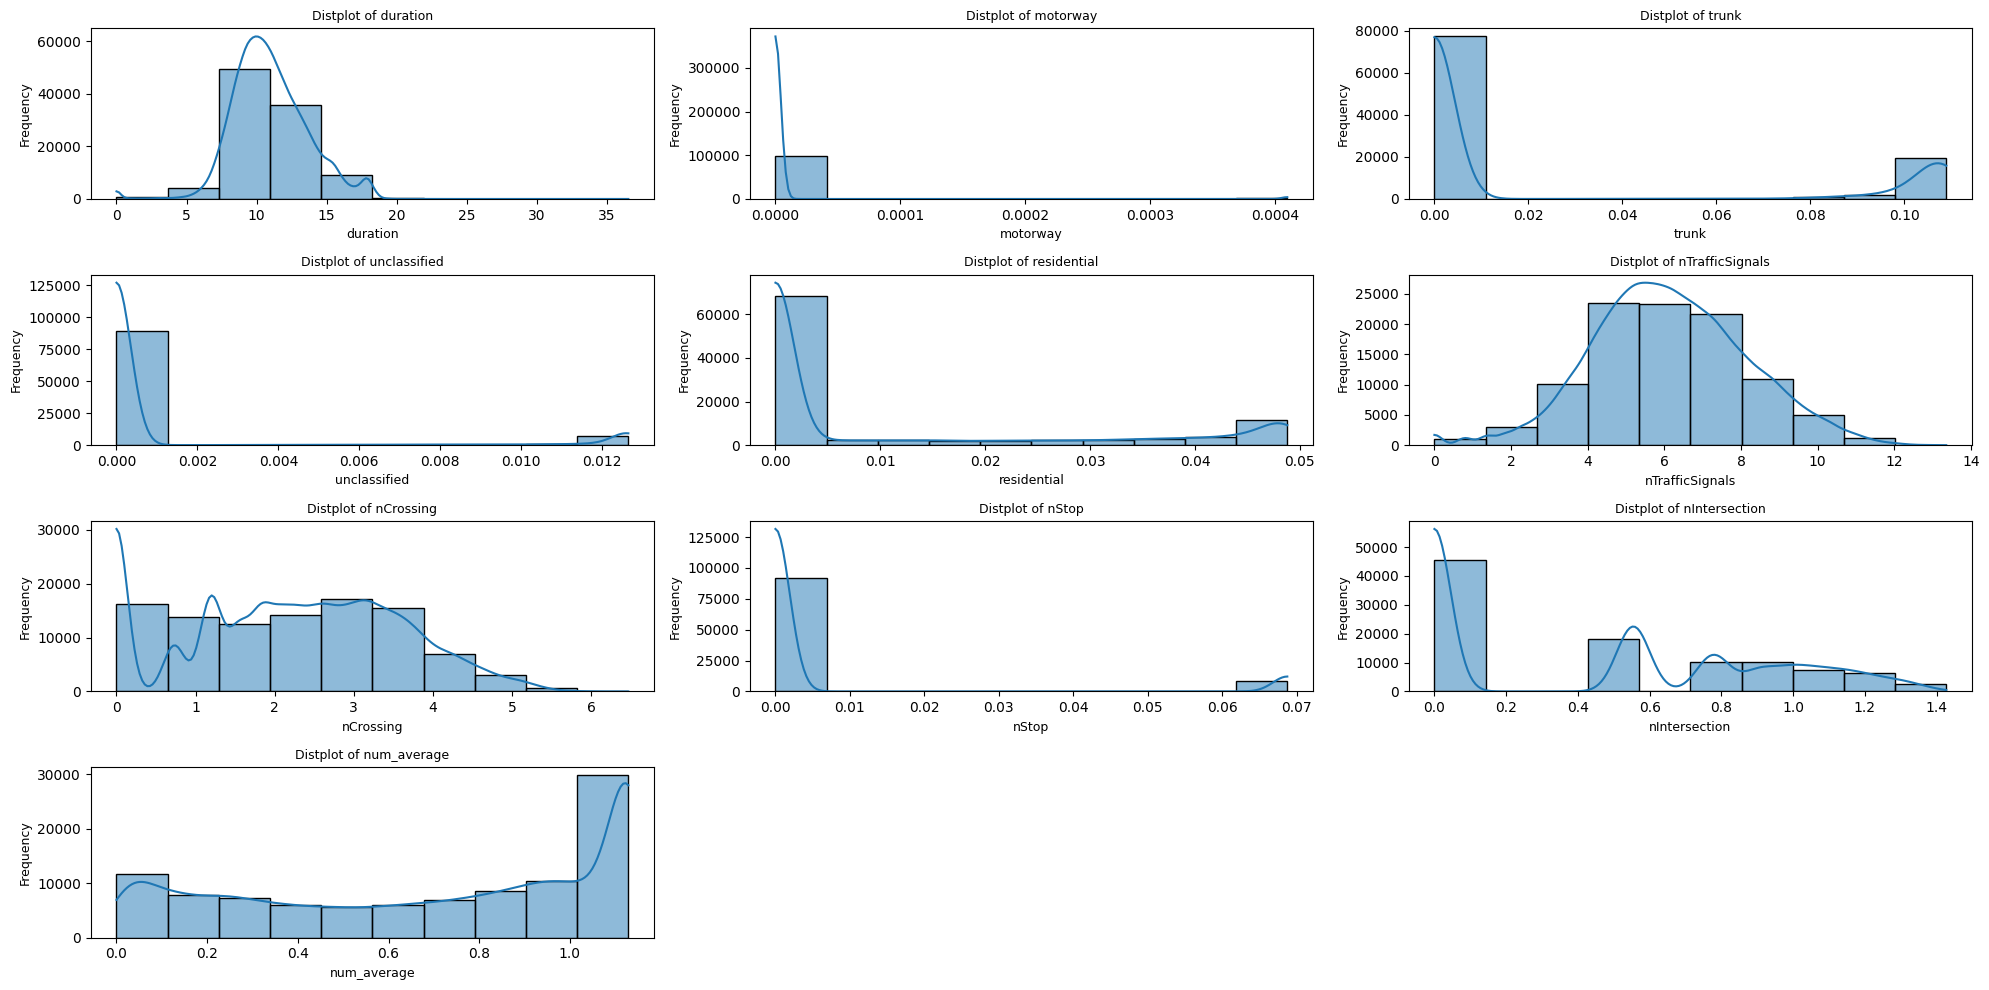

In [43]:
plt.figure(1, figsize=(20, 10))
n = 0 
for x in df_train_augmented_muestra_num.columns:
    n += 1
    plt.subplot(4, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.8)
    sns.histplot(df_train_augmented_muestra_num_transformed[x], bins=10, kde=True)
    plt.title('Distplot of {}'.format(x), fontsize=9) 
    plt.xlabel('{}'.format(x), fontsize=9)  
    plt.ylabel('Frequency', fontsize=9)
    plt.tight_layout()
plt.show()

## 14. **Aplicación de escalamiento a la base de datos**

In [44]:
from sklearn.preprocessing import RobustScaler

#
df_train_augmented_muestra_num_scaled = df_train_augmented_muestra_num.copy()  # Copia del DataFrame original para preservar los datos originales

scaler = RobustScaler()
df_train_augmented_muestra_num_scaled = scaler.fit_transform(df_train_augmented_muestra_num)

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir el array de NumPy en un DataFrame de pandas
df_train_augmented_muestra_num_scaled = pd.DataFrame(
    df_train_augmented_muestra_num_scaled,
    columns=df_train_augmented_muestra_num.columns  # Restaurar los nombres de las columnas
)

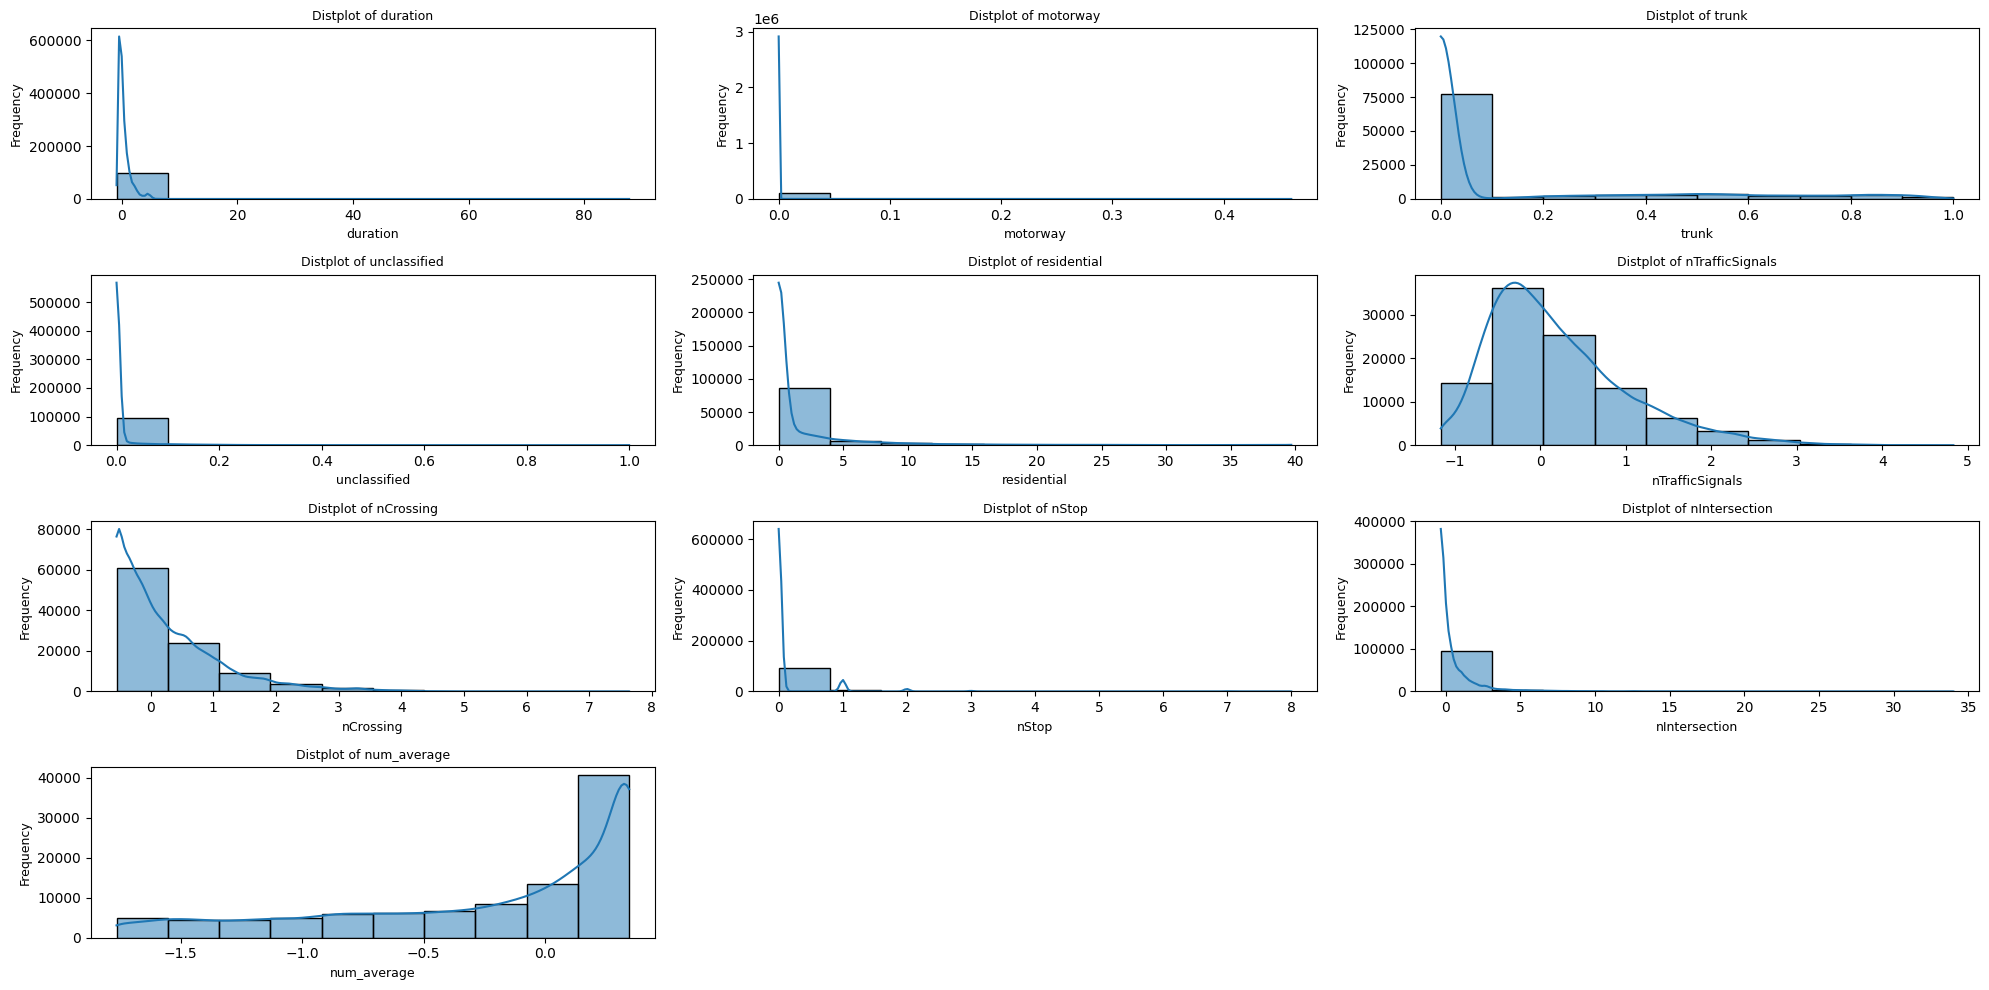

In [46]:
plt.figure(1, figsize=(20, 10))
n = 0 
for x in df_train_augmented_muestra_num.columns:
    n += 1
    plt.subplot(4, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.8)
    sns.histplot(df_train_augmented_muestra_num_scaled[x], bins=10, kde=True)
    plt.title('Distplot of {}'.format(x), fontsize=9) 
    plt.xlabel('{}'.format(x), fontsize=9)  
    plt.ylabel('Frequency', fontsize=9)
    plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 9, not 10

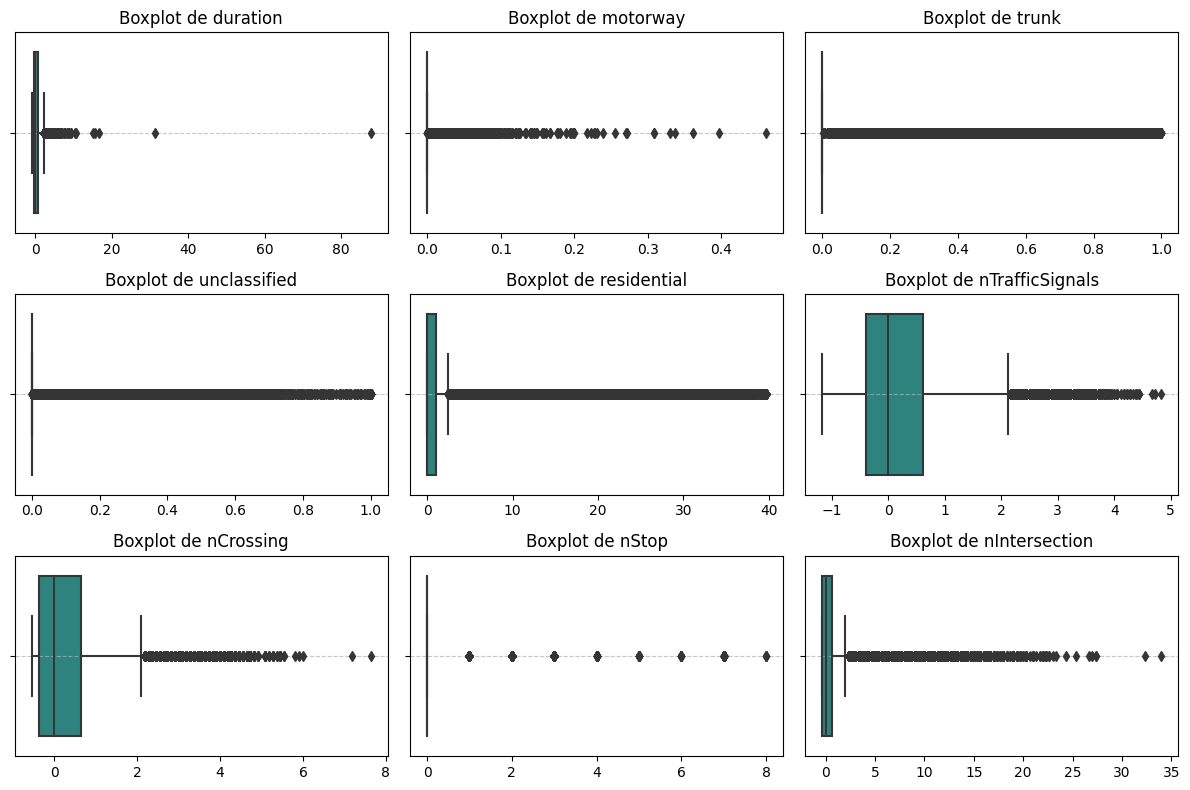

In [47]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_train_augmented_muestra_num_scaled.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_train_augmented_muestra_num_scaled[col], palette='viridis')
    plt.title(f'Boxplot de {col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
plt.show()

## 15. **Modelamiento de regresión lineal por Ridge y Lasso**

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [49]:
X = df_train_augmented_muestra_num_scaled.drop(columns="duration")
y = df_train_augmented_muestra_num_scaled["duration"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [50]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [51]:
a = modelo.coef_
b = modelo.intercept_

print(f"Coeficientes: {a}")
print(f"Intercepto {b}")

print("\nFunción:")
print(f"duration = ", end="")
for i in range(len(X.columns)-1):
    print(f"{a[i]:.4f}*{X.columns[i]}", end=" + ")
print(f"{b:.4f}")

Coeficientes: [-0.01578684  2.68841294 -0.03520374  0.00454984  0.59595474 -0.01599322
  0.01224946  0.17024885 -0.12830529]
Intercepto -0.22620013585805065

Función:
duration = -0.0158*motorway + 2.6884*trunk + -0.0352*unclassified + 0.0045*residential + 0.5960*nTrafficSignals + -0.0160*nCrossing + 0.0122*nStop + 0.1702*nIntersection + -0.2262


In [52]:
y_pred = modelo.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  0.2562670470521937
MAE:  0.27643271351635373
R2:  0.7825646070954989


In [53]:
r2s = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = i)
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    r2s.append(r2_score(y_test, y_pred))
    
print(f"Mejor valor encontrado: {max(r2s)}")
print(f"Semilla para obtener ese mejor valor: {r2s.index(max(r2s))}")

Mejor valor encontrado: 0.7963275886231862
Semilla para obtener ese mejor valor: 36


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 36)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

a = modelo.coef_
b = modelo.intercept_

print(f"Coeficientes: {a}")
print(f"Intercepto {b}")

print("\nFunción:")
print(f"duration = ", end="")
for i in range(len(X.columns)-1):
    print(f"{a[i]:.4f}*{X.columns[i]}", end=" + ")
print(f"{b:.4f}")

y_pred = modelo.predict(X_test)
print("\nMSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

Coeficientes: [ 0.0172114   2.69246528 -0.03380145  0.0047662   0.595039   -0.01550101
  0.01571437  0.17025818 -0.12600629]
Intercepto -0.22722612576763107

Función:
duration = 0.0172*motorway + 2.6925*trunk + -0.0338*unclassified + 0.0048*residential + 0.5950*nTrafficSignals + -0.0155*nCrossing + 0.0157*nStop + 0.1703*nIntersection + -0.2272

MSE:  0.23505243672653414
MAE:  0.2689903436787181
R2:  0.7963275886231862


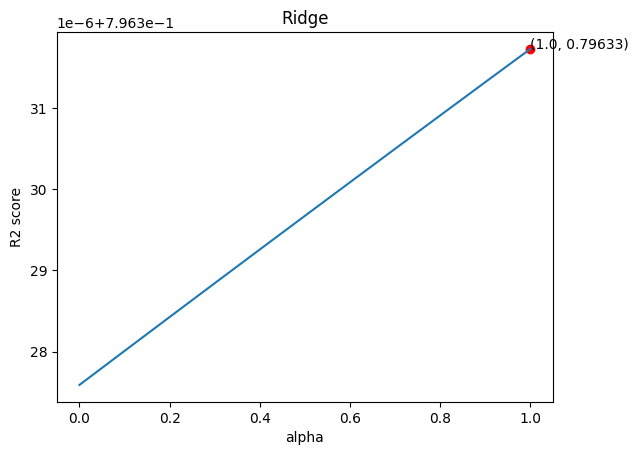

In [56]:
r2s = []
for i in np.arange(0.0, 1.1, 0.1):
    modelo_ridge = Ridge(alpha=i)
    modelo_ridge.fit(X_train, y_train)
    y_pred_ridge = modelo_ridge.predict(X_test)
    r2s.append(r2_score(y_test, y_pred_ridge))
    
x = np.arange(0.0, 1.1, 0.1)
y_max = np.max(r2s)
x_max = x[np.argmax(r2s)]

plt.plot(x, r2s)
plt.scatter(x_max, y_max, color='red')
plt.annotate(f'({x_max:.1f}, {y_max:.5f})', (x_max, y_max))
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.title("Ridge")
plt.show()

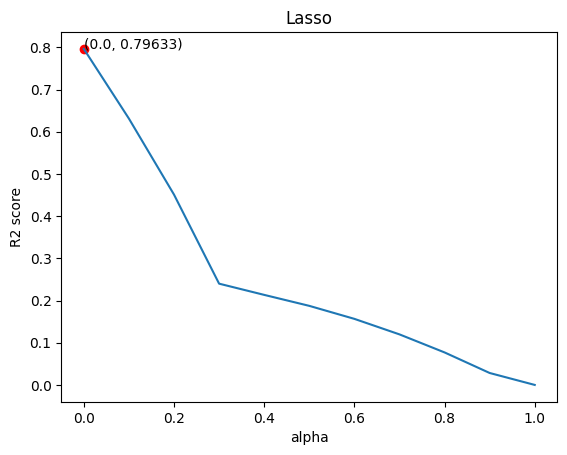

In [57]:
r2s = []
for i in np.arange(0.0, 1.1, 0.1):
    modelo_ridge = Lasso(alpha=i)
    modelo_ridge.fit(X_train, y_train)
    y_pred_ridge = modelo_ridge.predict(X_test)
    r2s.append(r2_score(y_test, y_pred_ridge))
    
x = np.arange(0.0, 1.1, 0.1)
y_max = np.max(r2s)
x_max = x[np.argmax(r2s)]

plt.plot(x, r2s)
plt.scatter(x_max, y_max, color='red')
plt.annotate(f'({x_max:.1f}, {y_max:.5f})', (x_max, y_max))
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.title("Lasso")
plt.show()

## 16. **Modelamiento de regresión lineal por Arboles de desición**

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [59]:
X = df_train_augmented_muestra_num_transformed.drop(columns="duration")
y = df_train_augmented_muestra_num_transformed["duration"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [60]:
# 3. Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeRegressor(
    max_depth=5,  # Profundidad máxima del árbol (puedes ajustar este parámetro)
    random_state=42  # Semilla para reproducibilidad
)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [61]:
# 4. Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [62]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  0.9264047475039099
MAE:  0.7021432537437003
R2:  0.8741444565632589


In [63]:
r2s = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = i)
    modelo = DecisionTreeRegressor(
    max_depth=5,  # Profundidad máxima del árbol 
    random_state=i  # Semilla para reproducibilidad
)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    r2s.append(r2_score(y_test, y_pred))
    
print(f"Mejor valor encontrado: {max(r2s)}")
print(f"Semilla para obtener ese mejor valor: {r2s.index(max(r2s))}")

Mejor valor encontrado: 0.8771113917805075
Semilla para obtener ese mejor valor: 4


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =4)
modelo = DecisionTreeRegressor(
    max_depth=5,  # Profundidad máxima del árbol (puedes ajustar este parámetro)
    random_state=4  # Semilla para reproducibilidad
)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print("\nMSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))


MSE:  0.9041180580310376
MAE:  0.6978862867649255
R2:  0.8771113917805075


In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
print(f"R² promedio con validación cruzada: {scores.mean():.4f}")

R² promedio con validación cruzada: 0.8676


In [66]:
importancias = modelo.feature_importances_
for i, importancia in enumerate(importancias):
    print(f"Característica {X.columns[i]}: {importancia:.4f}")

Característica motorway: 0.0000
Característica trunk: 0.5225
Característica unclassified: 0.0000
Característica residential: 0.0011
Característica nTrafficSignals: 0.4126
Característica nCrossing: 0.0000
Característica nStop: 0.0000
Característica nIntersection: 0.0628
Característica num_average: 0.0010


## 17. **Modelamiento de regresión lineal por Random Forest**

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [68]:
# 3. Crear y entrenar el modelo de Random Forest
model = RandomForestRegressor(
    n_estimators=100,  # Número de árboles en el bosque
    max_depth=5,       # Profundidad máxima de cada árbol
    random_state=42    # Semilla para reproducibilidad
)
model.fit(X_train, y_train)  # Entrenar el modelo

RandomForestRegressor(max_depth=5, random_state=42)

In [69]:
y_pred = model.predict(X_test)

In [70]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  0.8137513643597978
MAE:  0.6577262115474642
R2:  0.8893941209174967


In [71]:
# Lista para almacenar los valores de R²
r2s = []

# Bucle para realizar 100 iteraciones
for i in range(100):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    
    # Crear y entrenar el modelo de Random Forest
    modelo = RandomForestRegressor(
        n_estimators=100,  # Número de árboles en el bosque
        max_depth=5,       # Profundidad máxima de cada árbol
        random_state=i     # Semilla para reproducibilidad
    )
    modelo.fit(X_train, y_train)
    
    # Hacer predicciones en el conjunto de prueba
    y_pred = modelo.predict(X_test)
    
    # Calcular el R² y almacenarlo en la lista
    r2s.append(r2_score(y_test, y_pred))

# Encontrar el mejor valor de R² y su semilla correspondiente
mejor_r2 = max(r2s)
mejor_semilla = r2s.index(mejor_r2)

# Imprimir los resultados
print(f"Mejor valor de R² encontrado: {mejor_r2:.4f}")
print(f"Semilla para obtener ese mejor valor: {mejor_semilla}")

Mejor valor de R² encontrado: 0.8893
Semilla para obtener ese mejor valor: 4


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =4)
modelo = RandomForestRegressor(
    n_estimators=100,  # Número de árboles en el bosque
    max_depth=5,       # Profundidad máxima de cada árbol (puedes ajustar este parámetro)
    random_state=4    # Semilla para reproducibilidad
)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print("\nMSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))


MSE:  0.814438023733276
MAE:  0.6586704961284285
R2:  0.8893007895057655


In [73]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
print(f"R² promedio con validación cruzada: {scores.mean():.4f}")

R² promedio con validación cruzada: 0.8809


In [74]:
importancias = modelo.feature_importances_
for i, importancia in enumerate(importancias):
    print(f"Característica {X.columns[i]}: {importancia:.4f}")

Característica motorway: 0.0000
Característica trunk: 0.5224
Característica unclassified: 0.0000
Característica residential: 0.0013
Característica nTrafficSignals: 0.4115
Característica nCrossing: 0.0000
Característica nStop: 0.0000
Característica nIntersection: 0.0610
Característica num_average: 0.0037


## 18. **Modelamiento de regresión lineal por XGBRegressor**

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [76]:
X = df_train_augmented_muestra_num_transformed.drop(columns="duration")
y = df_train_augmented_muestra_num_transformed["duration"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [77]:
# 3. Crear y entrenar el modelo de XGBoost
model = XGBRegressor(
    n_estimators=100,  # Número de árboles
    max_depth=5,       # Profundidad máxima de cada árbol
    learning_rate=0.1, # Tasa de aprendizaje
    random_state=42    # Semilla para reproducibilidad
)
model.fit(X_train, y_train)  # Entrenar el modelo

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [78]:
# 4. Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [79]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  0.4541595724109206
MAE:  0.4723224694826472
R2:  0.9383007266027281


In [80]:
# 6. Visualizar la importancia de las características
importancias = model.feature_importances_
feature_names = X.columns

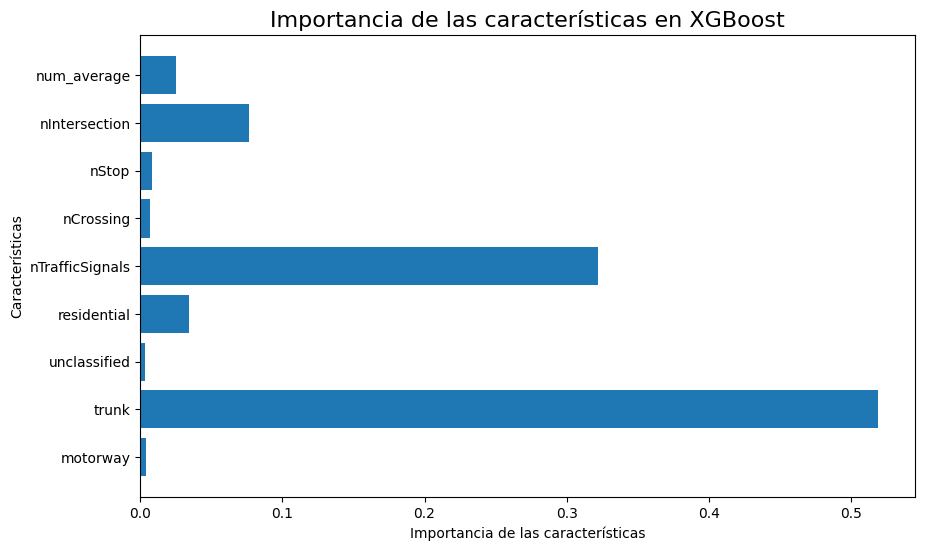

In [81]:
# Crear un gráfico de barras para la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importancias)
plt.xlabel("Importancia de las características")
plt.ylabel("Características")
plt.title("Importancia de las características en XGBoost", fontsize=16)
plt.show()

In [82]:
# Lista para almacenar los valores de R²
r2s = []

# Bucle para realizar 100 iteraciones
for i in range(100):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    
    # Crear y entrenar el modelo de XGBoost
    modelo = XGBRegressor(
        n_estimators=100,  # Número de árboles
        max_depth=5,       # Profundidad máxima de cada árbol
        learning_rate=0.1, # Tasa de aprendizaje
        random_state=i     # Semilla para reproducibilidad
    )
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    
    # Hacer predicciones en el conjunto de prueba
    y_pred = modelo.predict(X_test)
    
    # Calcular el R² y almacenarlo en la lista
    r2s.append(r2_score(y_test, y_pred))

# Encontrar el mejor valor de R² y su semilla correspondiente
mejor_r2 = max(r2s)
mejor_semilla = r2s.index(mejor_r2)

# Imprimir los resultados
print(f"Mejor valor de R² encontrado: {mejor_r2:.4f}")
print(f"Semilla para obtener ese mejor valor: {mejor_semilla}")

Mejor valor de R² encontrado: 0.9393
Semilla para obtener ese mejor valor: 93


In [83]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=93)

# Crear y entrenar el modelo de XGBoost
modelo = XGBRegressor(
    n_estimators=100,  # Número de árboles
    max_depth=5,       # Profundidad máxima de cada árbol
    learning_rate=0.1, # Tasa de aprendizaje
    random_state=93    # Semilla para reproducibilidad
)
modelo.fit(X_train, y_train)  # Entrenar el modelo

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
mae = mean_absolute_error(y_test, y_pred)  # Error absoluto medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R²

# Imprimir las métricas
print("\nMSE: ", mse)
print("MAE: ", mae)
print("R²: ", r2)


MSE:  0.44018081217824845
MAE:  0.4697847574716501
R²:  0.9393007754170035


In [84]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
print(f"R² promedio con validación cruzada: {scores.mean():.4f}")

R² promedio con validación cruzada: 0.9356


## 19. **Modelamiento de regresión lineal por lightgbm**

In [85]:
# Importar bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [86]:
X = df_train_augmented_muestra_num_transformed.drop(columns="duration")
y = df_train_augmented_muestra_num_transformed["duration"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [87]:
# 3. Crear el dataset de LightGBM
train_data = lgb.Dataset(X_train, label=y_train)

In [88]:
# 4. Definir los parámetros del modelo
params = {
    'objective': 'regression',  # Tipo de problema (regresión)
    'metric': 'rmse',           # Métrica de evaluación (Root Mean Squared Error)
    'boosting_type': 'gbdt',    # Tipo de boosting (Gradient Boosting Decision Tree)
    'num_leaves': 31,           # Número máximo de hojas en un árbol
    'learning_rate': 0.05,      # Tasa de aprendizaje
    'feature_fraction': 0.9,    # Fracción de características a usar en cada iteración
    'bagging_fraction': 0.8,    # Fracción de datos a usar en cada iteración
    'bagging_freq': 5,          # Frecuencia de bagging
    'verbose': 0                # Silenciar mensajes de entrenamiento
}

# 5. Entrenar el modelo
model = lgb.train(params, train_data, num_boost_round=100)

# 6. Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [89]:
# 7. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
mae = mean_absolute_error(y_test, y_pred)  # Error absoluto medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R²

# Imprimir las métricas
print("\nMSE: ", mse)
print("MAE: ", mae)
print("R²: ", r2)


MSE:  0.46465976731725345
MAE:  0.4825580231676982
R²:  0.9368742359249883


In [90]:
# Lista para almacenar los valores de R²
r2s = []

# Bucle para realizar 100 iteraciones
for i in range(100):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    
    # Crear el dataset de LightGBM para el conjunto de entrenamiento
    train_data = lgb.Dataset(X_train, label=y_train)
    
    # Definir los parámetros del modelo
    params = {
        'objective': 'regression',  # Tipo de problema (regresión)
        'metric': 'rmse',           # Métrica de evaluación (Root Mean Squared Error)
        'boosting_type': 'gbdt',    # Tipo de boosting (Gradient Boosting Decision Tree)
        'num_leaves': 31,           # Número máximo de hojas en un árbol
        'learning_rate': 0.05,      # Tasa de aprendizaje
        'feature_fraction': 0.9,    # Fracción de características a usar en cada iteración
        'bagging_fraction': 0.8,    # Fracción de datos a usar en cada iteración
        'bagging_freq': 5,          # Frecuencia de bagging
        'verbose': -1                # Silenciar mensajes de entrenamiento
    }
    
    # Entrenar el modelo
    modelo = lgb.train(params, train_data, num_boost_round=100)
    
    # Hacer predicciones en el conjunto de prueba
    y_pred = modelo.predict(X_test)
    
    # Calcular el R² y almacenarlo en la lista
    r2s.append(r2_score(y_test, y_pred))

# Encontrar el mejor valor de R² y su semilla correspondiente
mejor_r2 = max(r2s)
mejor_semilla = r2s.index(mejor_r2)

# Imprimir los resultados
print(f"Mejor valor de R² encontrado: {mejor_r2:.4f}")
print(f"Semilla para obtener ese mejor valor: {mejor_semilla}")

Mejor valor de R² encontrado: 0.9374
Semilla para obtener ese mejor valor: 4


In [91]:
# 1. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

# 2. Crear el dataset de LightGBM para el conjunto de entrenamiento
train_data = lgb.Dataset(X_train, label=y_train)

# 3. Definir los parámetros del modelo
params = {
    'objective': 'regression',  # Tipo de problema (regresión)
    'metric': 'rmse',           # Métrica de evaluación (Root Mean Squared Error)
    'boosting_type': 'gbdt',    # Tipo de boosting (Gradient Boosting Decision Tree)
    'num_leaves': 31,           # Número máximo de hojas en un árbol
    'learning_rate': 0.05,      # Tasa de aprendizaje
    'feature_fraction': 0.9,    # Fracción de características a usar en cada iteración
    'bagging_fraction': 0.8,    # Fracción de datos a usar en cada iteración
    'bagging_freq': 5,          # Frecuencia de bagging
    'verbose': -1                # Silenciar mensajes de entrenamiento
}

# 4. Entrenar el modelo
modelo = lgb.train(params, train_data, num_boost_round=100)

# 5. Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# 6. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
mae = mean_absolute_error(y_test, y_pred)  # Error absoluto medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R²

# 7. Imprimir las métricas
print("\nMSE: ", mse)
print("MAE: ", mae)
print("R²: ", r2)


MSE:  0.46026384956200134
MAE:  0.4830164736362196
R²:  0.9374404886795453


In [92]:
from sklearn.model_selection import KFold
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definir el número de folds
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Listas para almacenar los resultados de cada fold
mse_scores = []
mae_scores = []
r2_scores = []

# Bucle para realizar la validación cruzada
for train_index, test_index in kf.split(X):
    # Dividir los datos en entrenamiento y prueba para este fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Crear el dataset de LightGBM
    train_data = lgb.Dataset(X_train, label=y_train)
    
    # Definir los parámetros del modelo
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'verbose': -1
    }
    
    # Entrenar el modelo
    modelo = lgb.train(params, train_data, num_boost_round=100)
    
    # Hacer predicciones en el conjunto de prueba
    y_pred = modelo.predict(X_test)
    
    # Calcular las métricas y almacenarlas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Calcular los promedios y desviaciones estándar
mse_promedio = np.mean(mse_scores)
mse_std = np.std(mse_scores)

mae_promedio = np.mean(mae_scores)
mae_std = np.std(mae_scores)

r2_promedio = np.mean(r2_scores)
r2_std = np.std(r2_scores)

# Imprimir los resultados
print(f"MSE promedio con validación cruzada: {mse_promedio:.4f} (±{mse_std:.4f})")
print(f"MAE promedio con validación cruzada: {mae_promedio:.4f} (±{mae_std:.4f})")
print(f"R² promedio con validación cruzada: {r2_promedio:.4f} (±{r2_std:.4f})")

MSE promedio con validación cruzada: 0.4786 (±0.0125)
MAE promedio con validación cruzada: 0.4831 (±0.0048)
R² promedio con validación cruzada: 0.9343 (±0.0023)


## 20. **Modelamiento de regresión lineal por CatBoostRegressor**

In [93]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [94]:
X = df_train_augmented_muestra_num_transformed.drop(columns="duration")
y = df_train_augmented_muestra_num_transformed["duration"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [95]:
# 4. Crear y entrenar el modelo de CatBoost
model = CatBoostRegressor(
    iterations=1000,          # Número de iteraciones (árboles)
    learning_rate=0.1,        # Tasa de aprendizaje
    depth=6,                  # Profundidad máxima de los árboles
    loss_function='RMSE',     # Función de pérdida (Root Mean Squared Error)
    verbose=100               # Mostrar progreso cada 100 iteraciones
)

# Entrenar el modelo
model.fit(X_train, y_train)

# 5. Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

0:	learn: 2.4833429	total: 61.8ms	remaining: 1m 1s
100:	learn: 0.6994372	total: 726ms	remaining: 6.46s
200:	learn: 0.6664462	total: 1.37s	remaining: 5.43s
300:	learn: 0.6500596	total: 2.02s	remaining: 4.7s
400:	learn: 0.6372478	total: 2.68s	remaining: 4s
500:	learn: 0.6275873	total: 3.34s	remaining: 3.33s
600:	learn: 0.6195731	total: 4s	remaining: 2.66s
700:	learn: 0.6129410	total: 4.66s	remaining: 1.99s
800:	learn: 0.6071633	total: 5.32s	remaining: 1.32s
900:	learn: 0.6016667	total: 6s	remaining: 659ms
999:	learn: 0.5971894	total: 6.97s	remaining: 0us


In [96]:
# 6. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
mae = mean_absolute_error(y_test, y_pred)  # Error absoluto medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R²

# Imprimir las métricas
print("\nMSE: ", mse)
print("MAE: ", mae)
print("R²: ", r2)


MSE:  0.40972199240378526
MAE:  0.4456324688941593
R²:  0.9443377377427083


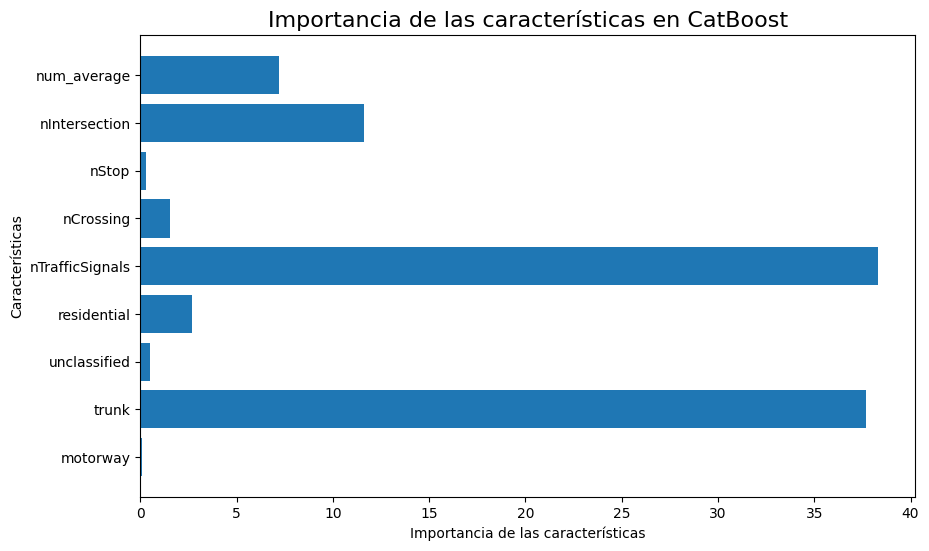

In [97]:
import matplotlib.pyplot as plt

importancias = model.get_feature_importance()
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importancias)
plt.xlabel("Importancia de las características")
plt.ylabel("Características")
plt.title("Importancia de las características en CatBoost", fontsize=16)
plt.show()

In [98]:
importancias = model.feature_importances_
for i, importancia in enumerate(importancias):
    print(f"Característica {X.columns[i]}: {importancia:.4f}")

Característica motorway: 0.0702
Característica trunk: 37.6923
Característica unclassified: 0.5242
Característica residential: 2.6915
Característica nTrafficSignals: 38.3307
Característica nCrossing: 1.5533
Característica nStop: 0.3088
Característica nIntersection: 11.6436
Característica num_average: 7.1855


In [99]:
# Lista para almacenar los valores de R²
r2s = []

# Bucle para realizar 100 iteraciones
for i in range(100):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    
    # Identificar columnas categóricas (si las hay)
    categorical_features = list(X_train.select_dtypes(include=['object', 'category']).columns)
    
    # Crear y entrenar el modelo de CatBoost
    modelo = CatBoostRegressor(
        iterations=1000,          # Número de iteraciones (árboles)
        learning_rate=0.1,        # Tasa de aprendizaje
        depth=6,                  # Profundidad máxima de los árboles
        loss_function='RMSE',     # Función de pérdida (Root Mean Squared Error)
        cat_features=categorical_features,  # Columnas categóricas
        verbose=0                 # Silenciar mensajes de entrenamiento
    )
    
    # Entrenar el modelo
    modelo.fit(X_train, y_train)
    
    # Hacer predicciones en el conjunto de prueba
    y_pred = modelo.predict(X_test)
    
    # Calcular el R² y almacenarlo en la lista
    r2s.append(r2_score(y_test, y_pred))

# Encontrar el mejor valor de R² y su semilla correspondiente
mejor_r2 = max(r2s)
mejor_semilla = r2s.index(mejor_r2)

# Imprimir los resultados
print(f"Mejor valor de R² encontrado: {mejor_r2:.4f}")
print(f"Semilla para obtener ese mejor valor: {mejor_semilla}")

Mejor valor de R² encontrado: 0.9451
Semilla para obtener ese mejor valor: 93


In [100]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=93)

# 2. Identificar columnas categóricas (si las hay)
# Si no tienes columnas categóricas, puedes omitir este paso.
categorical_features = list(X_train.select_dtypes(include=['object', 'category']).columns)

# 3. Crear y entrenar el modelo de CatBoost
modelo = CatBoostRegressor(
    iterations=1000,          # Número de iteraciones (árboles)
    learning_rate=0.1,        # Tasa de aprendizaje
    depth=6,                  # Profundidad máxima de los árboles
    loss_function='RMSE',     # Función de pérdida (Root Mean Squared Error)
    cat_features=categorical_features,  # Columnas categóricas
    verbose=0                 # Silenciar mensajes de entrenamiento
)

# Entrenar el modelo
modelo.fit(X_train, y_train)

# 4. Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# 5. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
mae = mean_absolute_error(y_test, y_pred)  # Error absoluto medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R²

# 6. Imprimir las métricas
print("\nMSE: ", mse)
print("MAE: ", mae)
print("R²: ", r2)


MSE:  0.39820563587996544
MAE:  0.4442065628351788
R²:  0.9450889892203999


In [101]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
print(f"R² promedio con validación cruzada: {scores.mean():.4f}")

R² promedio con validación cruzada: 0.9416


In [102]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': [500, 1000, 2000],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8]
}

grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print(f"Mejores parámetros: {grid_search.best_params_}")

Mejores parámetros: {'depth': 8, 'iterations': 2000, 'learning_rate': 0.1}


In [103]:
# Lista para almacenar los valores de R²
r2s = []

# Bucle para realizar 100 iteraciones
for i in range(100):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    
    # Identificar columnas categóricas (si las hay)
    categorical_features = list(X_train.select_dtypes(include=['object', 'category']).columns)
    
    # Crear y entrenar el modelo de CatBoost
    modelo = CatBoostRegressor(
        iterations=2000,          # Número de iteraciones (árboles)
        learning_rate=0.1,        # Tasa de aprendizaje
        depth=8,                  # Profundidad máxima de los árboles
        loss_function='RMSE',     # Función de pérdida (Root Mean Squared Error)
        cat_features=categorical_features,  # Columnas categóricas
        verbose=0                 # Silenciar mensajes de entrenamiento
    )
    
    # Entrenar el modelo
    modelo.fit(X_train, y_train)
    
    # Hacer predicciones en el conjunto de prueba
    y_pred = modelo.predict(X_test)
    
    # Calcular el R² y almacenarlo en la lista
    r2s.append(r2_score(y_test, y_pred))

# Encontrar el mejor valor de R² y su semilla correspondiente
mejor_r2 = max(r2s)
mejor_semilla = r2s.index(mejor_r2)

# Imprimir los resultados
print(f"Mejor valor de R² encontrado: {mejor_r2:.4f}")
print(f"Semilla para obtener ese mejor valor: {mejor_semilla}")

Mejor valor de R² encontrado: 0.9477
Semilla para obtener ese mejor valor: 4


In [104]:
# 1. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

# 2. Identificar columnas categóricas (si las hay)
# Si no tienes columnas categóricas, puedes omitir este paso.
categorical_features = list(X_train.select_dtypes(include=['object', 'category']).columns)

# 3. Crear y entrenar el modelo de CatBoost
modelo = CatBoostRegressor(
    iterations=2000,          # Número de iteraciones (árboles)
    learning_rate=0.1,        # Tasa de aprendizaje
    depth=8,                  # Profundidad máxima de los árboles
    loss_function='RMSE',     # Función de pérdida (Root Mean Squared Error)
    cat_features=categorical_features,  # Columnas categóricas
    verbose=0                 # Silenciar mensajes de entrenamiento
)

# Entrenar el modelo
modelo.fit(X_train, y_train)

# 4. Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# 5. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
mae = mean_absolute_error(y_test, y_pred)  # Error absoluto medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R²

# 6. Imprimir las métricas
print("\nMSE: ", mse)
print("MAE: ", mae)
print("R²: ", r2)


MSE:  0.385068386841162
MAE:  0.4297942253837574
R²:  0.9476611293094965


In [105]:
importancias = modelo.feature_importances_
for i, importancia in enumerate(importancias):
    print(f"Característica {X.columns[i]}: {importancia:.4f}")

Característica motorway: 0.1251
Característica trunk: 33.2733
Característica unclassified: 0.8810
Característica residential: 3.3159
Característica nTrafficSignals: 38.1176
Característica nCrossing: 2.5548
Característica nStop: 0.4234
Característica nIntersection: 13.4170
Característica num_average: 7.8918


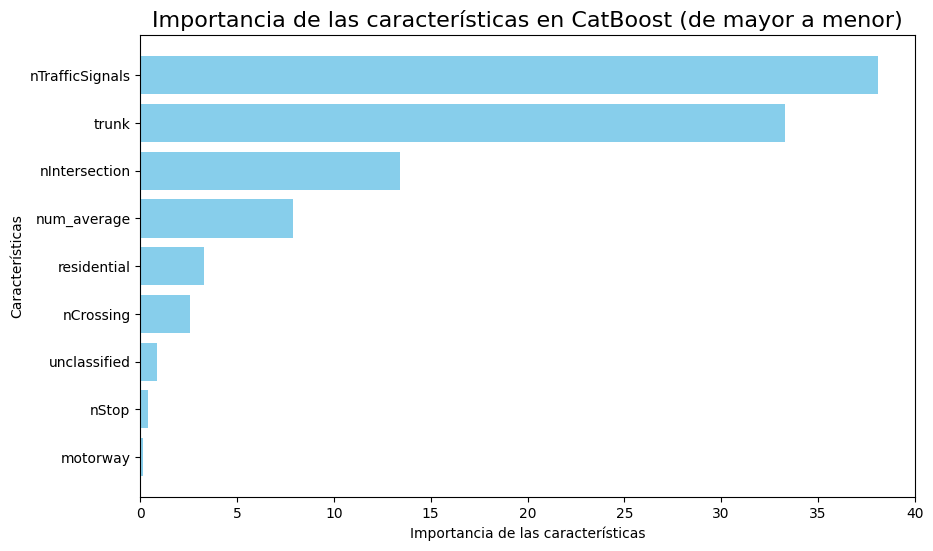

In [106]:
import matplotlib.pyplot as plt

# Obtener la importancia de las características
importancias = modelo.get_feature_importance()

# Obtener los nombres de las características
feature_names = X.columns

# Crear un DataFrame para facilitar el ordenamiento
importancias_df = pd.DataFrame({
    'Característica': feature_names,
    'Importancia': importancias
})

# Ordenar las características por importancia (de mayor a menor)
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(importancias_df['Característica'], importancias_df['Importancia'], color='skyblue')
plt.xlabel("Importancia de las características")
plt.ylabel("Características")
plt.title("Importancia de las características en CatBoost (de mayor a menor)", fontsize=16)
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más importante en la parte superior
plt.show()

## 21. **Modelamiento de regresión lineal por Redes Neuronales**

In [110]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [112]:
X = df_train_augmented_muestra_num_scaled.drop(columns="duration")
y = df_train_augmented_muestra_num_scaled["duration"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [113]:
# 4. Crear el modelo de red neuronal
model = Sequential()

# Capa de entrada y primera capa oculta
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # 64 neuronas, función de activación ReLU

# Segunda capa oculta
model.add(Dense(32, activation='relu'))  # 32 neuronas, función de activación ReLU

# Capa de salida (1 neurona para regresión, sin función de activación)
model.add(Dense(1))

# 5. Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')  # Optimizador Adam y pérdida MSE

# 6. Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# 7. Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# 8. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
mae = mean_absolute_error(y_test, y_pred)  # Error absoluto medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R²

# Imprimir las métricas
print("\nMSE: ", mse)
print("MAE: ", mae)
print("R²: ", r2)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3401 - val_loss: 0.1630
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1967 - val_loss: 0.1476
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4569 - val_loss: 0.1306
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2451 - val_loss: 0.1319
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1632 - val_loss: 0.1295
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2050 - val_loss: 0.1312
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2911 - val_loss: 0.1243
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4587 - val_loss: 0.1180
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1097 - val_loss: 0.1369
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2544 - val_loss: 0.1242
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1627 - val_loss: 0.1228
Epoch 12/100
1875/1